# Module 3: Machine Learning
## Sprint 4: Capstone Project


# About this Sprint

It is time for your third Capstone Project.
You will work on this project for the whole Sprint.
This time your objective is even more challenging - you will be required to iteratively build and implement a plan for a large dataset based on business objectives.
You'll have to translate the business requirements, making assumptions where necessary, into a plan for your project.

Even though you have learned a lot about machine learning in this Sprint, working on a larger project will be the real challenge.

Good luck!

## Context

You and your friend came up with a brilliant startup idea - provide risk evaluation as a service for retail banks.
As with most successful startup teams, both of you have your specialty.
Your friend is responsible for sales and operations, while you are responsible for everything product-related, from planning to data analysis to building the solution.
You have quickly identified that machine learning will be an essential part of your offering because you believe that the models can capture statistical patterns in the defaults on bank loans.
You decide to start your investigation by downloading [this](https://storage.googleapis.com/341-home-credit-default/home-credit-default-risk.zip) dataset from Home Credit Group.
You are not yet sure, what is the most crucial problem for your potential clients, so you had a meeting with your friend to discuss how your proof-of-concept (POC) product should look like.
After a lot of arguing, you both agreed to create a number of different models so that you have a robust and diversified offering when you get your first meeting with the potential clients.
You are eager to investigate the dataset and see what you can predict, so you propose that you come up with interesting features to analyze and predict - this way, you'll focus on building a solid offering, and she can work on getting meetings with the banks.

## Objectives for this Part

- Practice translating business requirements into data science tasks.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using machine learning to solve business problems.
- Practice deploying multiple machine learning models.

## Requirements

- Download the data from [here](https://storage.googleapis.com/341-home-credit-default/home-credit-default-risk.zip) and the data description from [here](https://storage.googleapis.com/341-home-credit-default/Home%20Credit%20Default%20Risk.pdf).
- Create a plan for your investigation, analysis, and POC building. This should include your assumptions, overall objectives, and objectives for each step in your plan. You are not expected to have a plan for the whole project but instead have a clear understanding of what you'll try to achieve in the next step and build the plan one step at a time.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
- Use machine learning models to predict the target variables based on your proposed plan. You should use hyperparameter tuning, model ensembling, the analysis of model selection, and other methods. The decision of where to use and not to use these techniques is up to you; however, they should be aligned with your team's objectives.
- Deploy these machine learning models to Google Cloud Platform. You are free to choose any deployment option you wish as long as it can be called an HTTP request.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results you got, and what these results mean.
- Provide suggestions about how your analysis and models can be improved.

## Bonus Challenges

As a data scientist, you will spend a significant amount of your time learning new things.
Sometimes you will do that for fun, but most of the time, you will have an urgent problem, and you will need to quickly learn some new skills to be able to solve it.
It is essential to build this skill gradually - it is extremely valuable for all data scientists.
The bonus challenges are designed to simulate these types of situations.
These challenges require you to do something that we haven't covered in the course yet.
Instead of trying to do all of the bonus challenges, concentrate on just one or two and do them well.
All of the bonus challenges are optional - no points will be deducted if you skip them.

- Provide a write-up on your project. Appendix B. Machine Learning Project Checklist from the [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/app02.html).
- Try using a multi-output model.
- Try using a deep neural network-based model.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you skim the surface, or did you explore the dataset in-depth?
- Models' performance. How well did your models perform the predictions?
- Models' deployment. How performant, robust, and scalable your models' deployment is?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented-out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use suitable algorithms and data structures to solve the problems?
- Delivery of the presentation. How clear are your reasoning and explanations?
- Bonus challenges. Have you put extra effort into doing one or more of the bonus challenges (no points will be deducted if you skip them)?


This task is based on the Home Credit Default Risk Kaggle Competition.


## Table of contents
* [Introduction](#introduction)
* [Data Content](#data_content)
* [Data Cleaning](#data)
* [Exploratory Data Analysis](#eda)
* [Inferential Statistical Analysis](#inf)
* [Machine Learning](#ml)
* [Conclusion](#conclusion)
* [Bonus Challenge](#bonus)

## **Introduction**<a name="introduction"></a>

I will analyse Home Credit Group data set. It consists of information about clients who have loan, taken from ```Home Credit```. I will do a data cleaning first, then EDA part, Inferential Statistics Analyses and lastly a Machine Learning modelling. For the ML part the task is to predict whether client is going to ```default or not```.

### **Data Content**<a name="data_content"></a>

Data sets consists of several tables:

**Application** table contains some demographic information about client as well as financial data.  
**Bureau** table contains all client's previous credits provided by other financial institutions that were reported to Credit Bureau.  
**Bureau_balance** table contains Monthly balances of previous credits in Credit Bureau.  
**POS_CASH_balance** table contains Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.  
**Credit_card_balance** consists of Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.  
**previous_application** table consists of all previous applications for Home Credit loans of clients who have loans in ourdata set.  
**Installments_payments** table contains repayment history for the previously disbursed credits in Home Credit related to the loans in our data set.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from copy import deepcopy

warnings.filterwarnings("ignore")
import shap
import optuna
import joblib
import scipy.stats as stats
import statsmodels.api as sm
from helper_functions import nominal
from helper_functions.general_functions import (
    reduce_memory_usage_2,
    drop_nan_features,
    agg_numeric_features,
    count_categorical_features,
    mode_categorical_features,
    nunique_categorical_features,
    get_duplicate_columns,
    agg_client_level,
    calc_ratio,
    quartiles_sorting,
    cut_sorting,
)
from helper_functions.plotting_functions import (
    plot_single_violin,
    plot_violin,
    small_catplot,
    cat_plot,
    catplot_with_pct,
    catplot_with_pct_2,
    catplot_with_pct_3,
    catplot_with_pct_4,
    heat_map,
    plot_mean_diff_conf_int,
    plot_perm_diffs,
    plot_cm_without_model,
    plot_cm,
    plot_multi_cm,
    plot_pr_auc,
    plot_learning_curve,
    plot_validation_curve,
    plot_discrimination_threshold,
)
from helper_functions.statistical_functions import (
    two_proportions_ztest,
    diff_in_two_means_unpooled_ci,
    sampling_mean_diff_ci,
    perm_test,
)
from helper_functions.ml_functions import (
    numeric_imputation_search,
    model_based_cat_imputation,
    categorical_imputation_search,
    pipeline_objective_3,
    pipeline_objective_4,
    tune_pipeline,
    domain_feature_creation,
    cyclic_weekday_appr_process_start,
    baseline_clfmodels_eval_cv,
    tune_model,
    light_gbm_objective,
    light_gbm_hptuned_eval_cv,
    clfmodels_eval_test,
    KmeansClustering,
    LGBMWithThreshold,
)
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    OneHotEncoder,
    FunctionTransformer,
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from probatus.feature_elimination import ShapRFECV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from ml_functions.pytorch_functions import (
    TrainData,
    ValData,
    TestData,
    BinaryClassification,
    avg_precision,
    torchclf_eval_test,
)

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 250)
pd.options.display.float_format = "{:.3f}".format
np.set_printoptions(suppress=True)
optuna.logging.set_verbosity(optuna.logging.WARNING)
%matplotlib inline

### **Data Cleaning**<a name="data"></a>

First, we will aggregate data in tables where we have several records per client and then join aggregated data to the main ```application_train``` data set.

In [3]:
df_names = [
    file.split(".")[0]
    for file in os.listdir(r"./datasets")
    if file.split(".")[0]
    not in ["application_test", "HomeCredit_columns_description", "bureau_balance"]
]
files = [file for file in os.listdir(r"./datasets") if file.split(".")[0] in df_names]
df_dict = {
    name: reduce_memory_usage_2(pd.read_csv("datasets/" + file, encoding="cp1252"))
    for name, file in zip(df_names, files)
}

Mem. usage decreased to 161.88 Mb (43.4% reduction)
Mem. usage decreased to 130.95 Mb (41.2% reduction)
Mem. usage decreased to 351.59 Mb (47.8% reduction)
Mem. usage decreased to 415.20 Mb (50.0% reduction)
Mem. usage decreased to 343.37 Mb (43.7% reduction)
Mem. usage decreased to 337.68 Mb (28.4% reduction)


In [4]:
application_train = df_dict["application_train"]
bureau = df_dict["bureau"]
installments_payments = df_dict["installments_payments"]
pos_cash_balance = df_dict["POS_CASH_balance"]
previous_application = df_dict["previous_application"]

In [5]:
bureau = drop_nan_features(bureau, 60)
bureau_numeric_agg = agg_numeric_features(bureau, "SK_ID_CURR", "bureau")
bureau_categorical_count = count_categorical_features(bureau, "SK_ID_CURR", "bureau")
bureau_categorical_mode = mode_categorical_features(bureau, "SK_ID_CURR", "bureau")
bureau_categorical_nunique = nunique_categorical_features(
    bureau, "SK_ID_CURR", "bureau"
)

In [6]:
df_lst = [
    bureau_numeric_agg,
    bureau_categorical_count,
    bureau_categorical_mode,
    bureau_categorical_nunique,
]
for df in df_lst:
    application_train = pd.merge(application_train, df, how="left", on="SK_ID_CURR")

In [7]:
installments_client_agg = agg_client_level(
    installments_payments, ["SK_ID_CURR", "SK_ID_PREV"], ["client", "installments"]
)
application_train = pd.merge(
    application_train, installments_client_agg, how="left", on="SK_ID_CURR"
)
pos_cash_balance_agg = agg_client_level(
    pos_cash_balance, ["SK_ID_CURR", "SK_ID_PREV"], ["client", "pos_cash_balance"]
)
application_train = pd.merge(
    application_train, pos_cash_balance_agg, how="left", on="SK_ID_CURR"
)

In [8]:
previous_application = drop_nan_features(previous_application, 60)
cols_to_drop = [
    col
    for col in previous_application.select_dtypes("object")
    if previous_application[col].nunique() > 10
]
previous_application = previous_application.drop(cols_to_drop, axis=1)

In [9]:
previous_application_numeric_agg = agg_numeric_features(
    previous_application, "SK_ID_CURR", "previuos_application"
)
previous_application_categorical_count = count_categorical_features(
    previous_application, "SK_ID_CURR", "previuos_application"
)
previous_application_categorical_nunique = nunique_categorical_features(
    previous_application, "SK_ID_CURR", "previuos_application"
)

In [10]:
df_lst_2 = [
    previous_application_numeric_agg,
    previous_application_categorical_count,
    previous_application_categorical_nunique,
]
for df in df_lst_2:
    application_train = pd.merge(application_train, df, how="left", on="SK_ID_CURR")

In [11]:
application_train.columns = [col.lower() for col in application_train.columns]
application_train = drop_nan_features(application_train, 60)
application_train = application_train.drop(
    "client_pos_cash_balance_name_contract_status_xna_count_norm_min", axis=1
)

###  **Exploratory data analysis**<a name="eda"></a>

For eda let's pick features which best describes clients and are understandable.

In [12]:
eda_cols = [
    "target",
    "name_contract_type",
    "code_gender",
    "flag_own_car",
    "flag_own_realty",
    "cnt_children",
    "amt_income_total",
    "amt_credit",
    "amt_annuity",
    "name_type_suite",
    "name_income_type",
    "name_education_type",
    "name_family_status",
    "name_housing_type",
    "days_birth",
    "days_employed",
    "occupation_type",
    "cnt_fam_members",
    "weekday_appr_process_start",
    "organization_type",
    "client_pos_cash_balance_sk_dpd_mean_mean",
    "previuos_application_amt_credit_mean",
    "client_installments_amt_instalment_mean_mean",
]
loans_eda = application_train[eda_cols].copy()
loans_eda["target"] = loans_eda["target"].replace({1: "Yes", 0: "No"})

In [13]:
loans_eda["client_age"] = round(abs(loans_eda["days_birth"] / 365))
loans_eda["client_empl_length"] = round(abs(loans_eda["days_employed"] / 365))
loans_eda.drop(["days_birth", "days_employed"], axis=1, inplace=True)
loans_eda.rename(
    columns={
        "client_pos_cash_balance_sk_dpd_mean_mean": "dpd_m",
        "previuos_application_amt_credit_mean": "prev_cred_amt_m",
        "client_installments_amt_instalment_mean_mean": "prev_install_m",
    },
    inplace=True,
)

In [14]:
loans_eda.describe()

,cnt_children,amt_income_total,amt_credit,amt_annuity,cnt_fam_members,dpd_m,prev_cred_amt_m,prev_install_m,client_age,client_empl_length
count,307511.000,307511.000,307511.000,307499.000,307509.000,289444.000,291057.000,291643.000,307511.000,307511.000
mean,0.417,168739.094,598830.812,27110.959,2.153,2.984,170068.766,22717.074,43.939,185.608
std,0.722,237175.922,402479.531,14493.233,0.910,44.643,165729.781,36094.520,11.964,382.166
min,0.000,25650.000,45000.000,1615.500,1.000,0.000,0.000,0.000,21.000,0.000
25%,0.000,112500.000,270000.000,16524.000,2.000,0.000,66849.430,8293.644,34.000,3.000
50%,0.000,147150.000,513531.000,24903.000,2.000,0.000,117450.000,13397.551,43.000,6.000
75%,1.000,202500.000,808650.000,34596.000,3.000,0.000,216072.000,23823.051,54.000,16.000
max,19.000,117000000.000,4050000.000,258025.500,20.000,2298.543,4050000.000,2504589.750,69.000,1001.000


We see that ```cnt_children``` feature which shows that a number of children client has varies from 0 to 19, average being quite low - ```0.4``` child.\
```amt_income_total``` is monthly income of the client and varies from 25k to 117 million in unknown currency, most probably Russian roubles. So, we have outliers, which we will need to deal with in machine learning part.\
```amty_credit``` which shows credit amount of the loan varies from 45k to 4 million, average being almost 600k.\
```amt_annuity``` shows loan annuity per month. It varies from 1615 to 260k, averaging at 27k.\
```cnt_fam_members``` features describes how many families’ members client has. It varies from 1 to 20, average being 2 members.\
```dpd_m``` is constructed feature showing average number of days past due (DPD) during the month of all client's previous credits he/she had. We see that average number of DPD is 3 days, with some outliers being 2298 days (over 6 years).\
```prev_cred_amt_m``` - this feature shows average amount of previous credits. Average being around 170k.\
```prev_install_m``` - clients all previous credits average instalment amount.	
```client_age``` and ```client_empl_length``` shows clients age and employment length at the time of loan application. Average age is around 44 years. For ```client_empl_length``` we have 55374 clients with employment length of ```1001 years (365243 days).``` This is an anomaly. Looks like for those clients this feature was imputed with special value.

Let's check interesting features distribution in more details. 

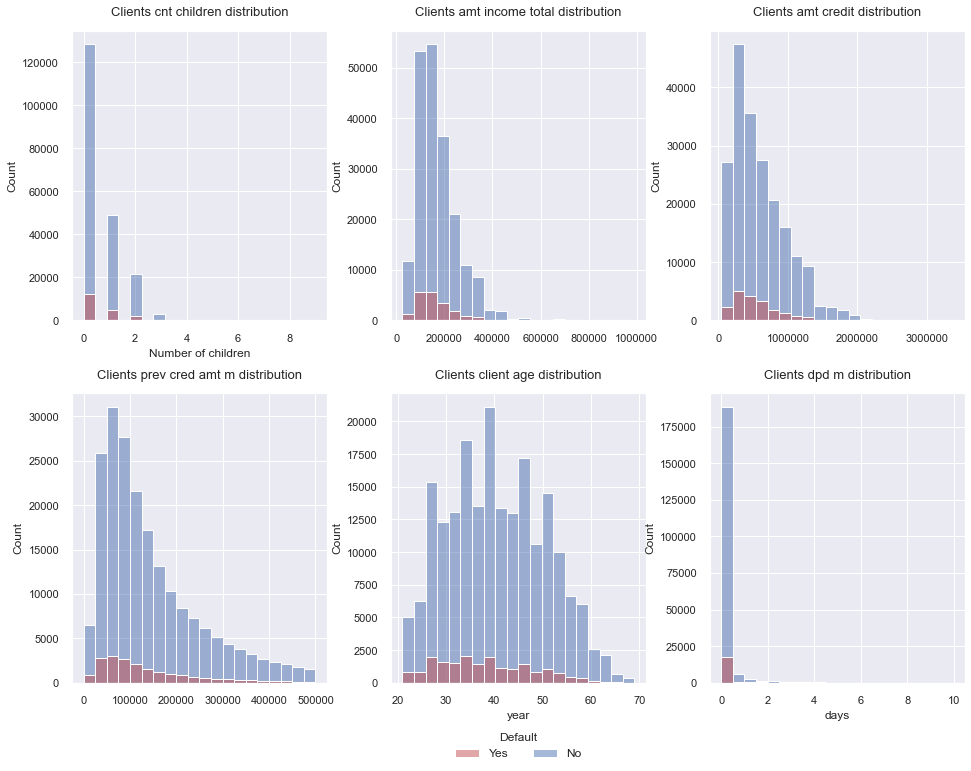

In [15]:
subset = loans_eda[
    (loans_eda["amt_income_total"] < 1000000)
    & (loans_eda["client_empl_length"] < 55)
    & (loans_eda["cnt_children"] < 10)
    & (loans_eda["prev_cred_amt_m"] < 500000)
    & (loans_eda["dpd_m"] < 10)
]
col_lst = [
    "cnt_children",
    "amt_income_total",
    "amt_credit",
    "prev_cred_amt_m",
    "client_age",
    "dpd_m",
]
measure_lst = [
    "Number of children",
    "",
    "",
    "",
    "year",
    "days",
]

fig, axes = plt.subplots(
    2, 3, figsize=(16, 12), gridspec_kw={"hspace": 0.25, "wspace": 0.25},
)

for i, ax in enumerate(axes.flatten()):

    if i == 4:
        legend = True
    else:
        legend = False
    sns.histplot(
        data=subset,
        x=subset[col_lst[i]],
        hue=subset["target"],
        bins=20,
        palette=sns.color_palette(["r", "b"]),
        legend=legend,
        ax=ax,
    )
    if legend:
        legend = ax.get_legend()
        handles = legend.legendHandles
        order = [0, 1]
        legend.remove()
        ax.legend(
            [handles[i] for i in order],
            ["Yes", "No"],
            title="Default",
            fontsize=12,
            loc="lower center",
            ncol=2,
            bbox_to_anchor=(0.5, -0.3),
            facecolor="white",
            edgecolor="white",
        )
    ax.set_xlabel(f"{measure_lst[i]}", fontsize=12, labelpad=5)
    ax.ticklabel_format(style="plain")
    ax.set_ylabel("Count", fontsize=12, labelpad=5)
    ax.set_title(
        f"Clients {' '.join(col_lst[i].split('_'))} distribution", fontsize=13, y=1.03
    )


plt.show()

Even though we capped some features, the distributions are mainly ```Right Skewed``` except for client's ```age```. Interesting that most clients ```were not late``` with their payments if looking at historical data. We also see that loans which were ```defaulted``` follows overall distribution of plotted features, but let's investigate some features with more detailed plot.\
Let's check age distribution in kde plot to see differences between default and not default clients age distributions.

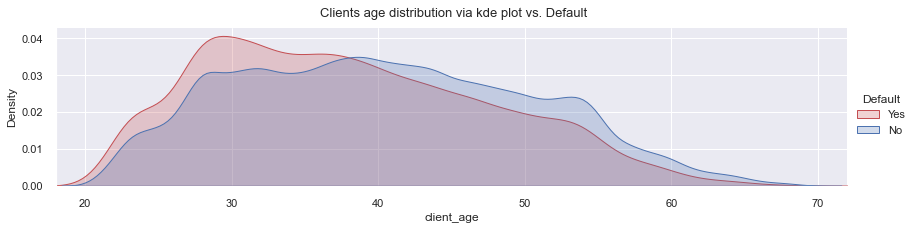

In [16]:
g = sns.FacetGrid(subset, hue="target", aspect=4, palette=sns.color_palette(["r", "b"]))
g.map(sns.kdeplot, "client_age", fill=True)
g.set(xlim=(subset["client_age"].min() - 3, subset["client_age"].max() + 3))
g.add_legend()
g.legend.set_title("Default")
g.fig.suptitle("Clients age distribution via kde plot vs. Default", fontsize=13, y=1.05)

plt.show()

We can see more detail situation on what's going on with clients age and their ```default``` status. Histogram plot did not reveal those differences, in particular - that younger clients tend to ```default``` their loans.

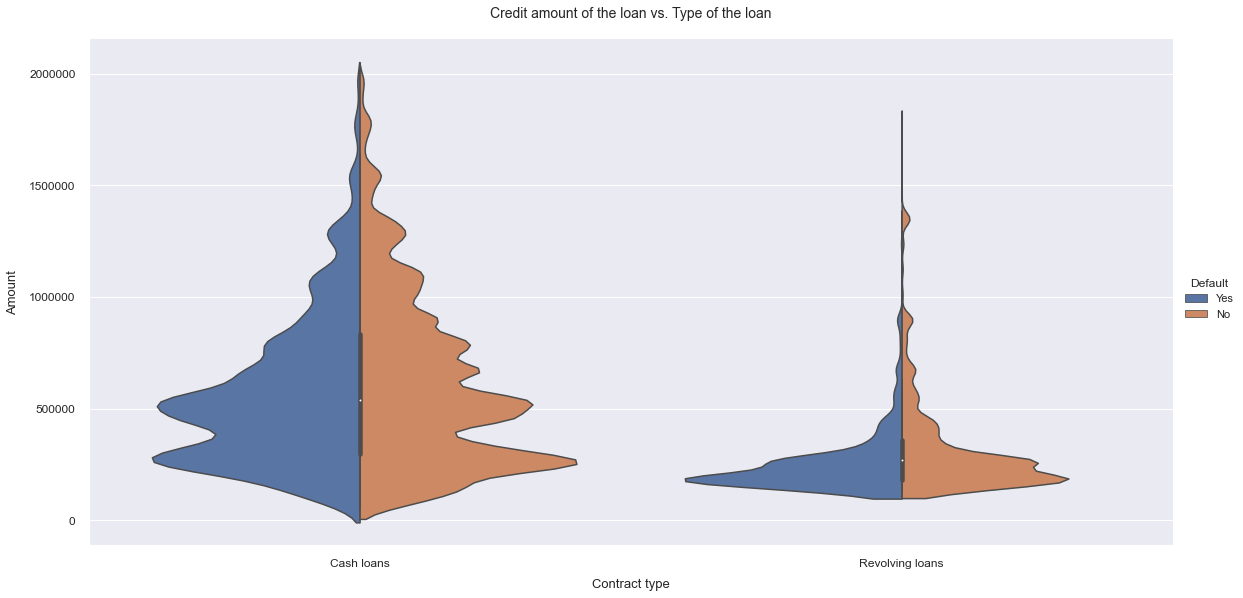

In [17]:
plot_single_violin(
    loans_eda[loans_eda["amt_credit"] < 2000000],
    "name_contract_type",
    "amt_credit",
    "Contract type",
    "Amount",
    "Credit amount of the loan vs. Type of the loan",
    "Default",
    True,
    "target",
)

We see that ```cash loans``` have much higher median and distribution is more even compared vs ```Revolving loans```. Also, we can see that for ```Revolving``` loan type, ```default``` loans are more concentrated in a lower range of loan amount.

In [18]:
loans_eda["AgeRanges"], loans_eda["AgeLabels"] = quartiles_sorting(
    loans_eda["client_age"], "year"
)
subplot_titles = ["Male", "Female"]
x_labels = loans_eda["AgeLabels"].unique().sort_values()

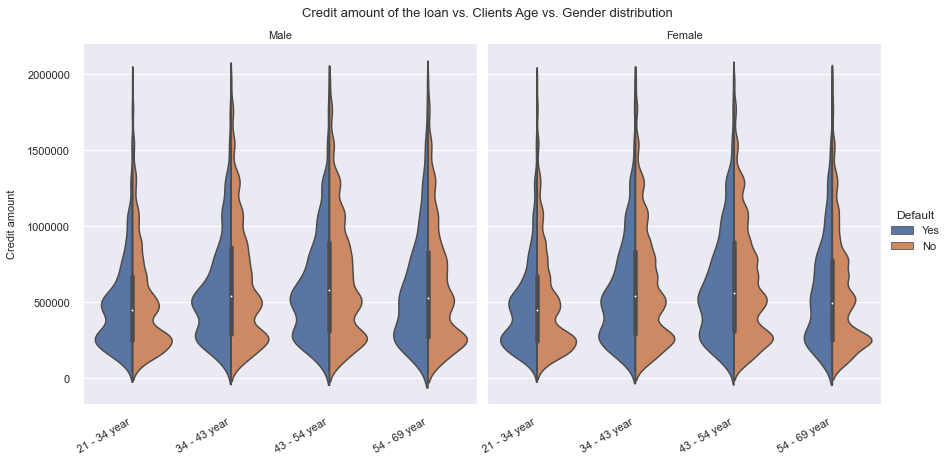

In [19]:
plot_violin(
    loans_eda[
        (loans_eda["code_gender"].isin(["M", "F"]))
        & (loans_eda["amt_credit"] < 2000000)
    ],
    "AgeRanges",
    "amt_credit",
    "code_gender",
    x_labels,
    "Credit amount",
    subplot_titles,
    "Credit amount of the loan vs. Clients Age vs. Gender distribution",
    "Default",
    True,
    "target",
)

We see that there is no big difference in ```credit amount``` distributions between being a male or female when also taking into consideration age. Let's also check if the same situation holds vs ```amt_income_total```. Distribution of loans which were ```defaulted``` resembles ```bi-modal``` distribution in higher or lower degree across all age ranges.

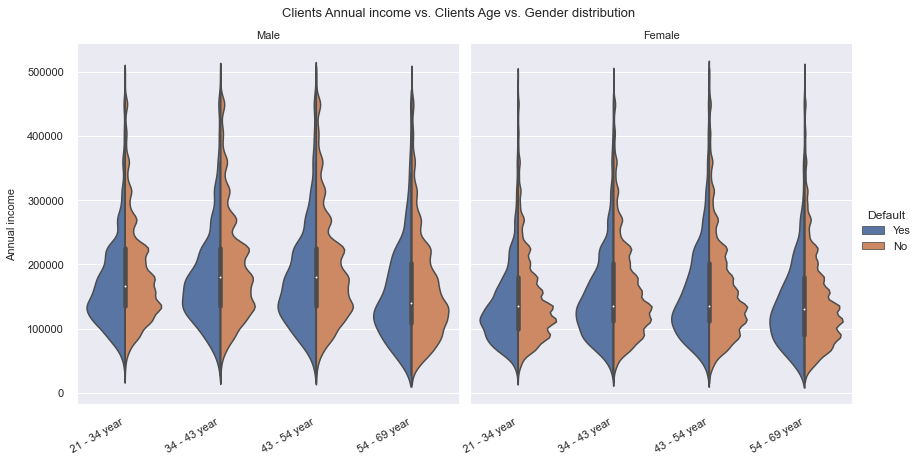

In [20]:
plot_violin(
    loans_eda[
        (loans_eda["code_gender"].isin(["M", "F"]))
        & (loans_eda["amt_income_total"] < 500000)
    ],
    "AgeRanges",
    "amt_income_total",
    "code_gender",
    x_labels,
    "Annual income",
    subplot_titles,
    "Clients Annual income vs. Clients Age vs. Gender distribution",
    "Default",
    True,
    "target",
)

We see that ```Male``` clients have higher median income compared with ```Female``` clients. Also, we see a noticeable drop in the last age group. Mainly because of clients hitting a retirement age and that influencing their annual income.\
Let's also check what is a distribution of average amount of client's previous credits.

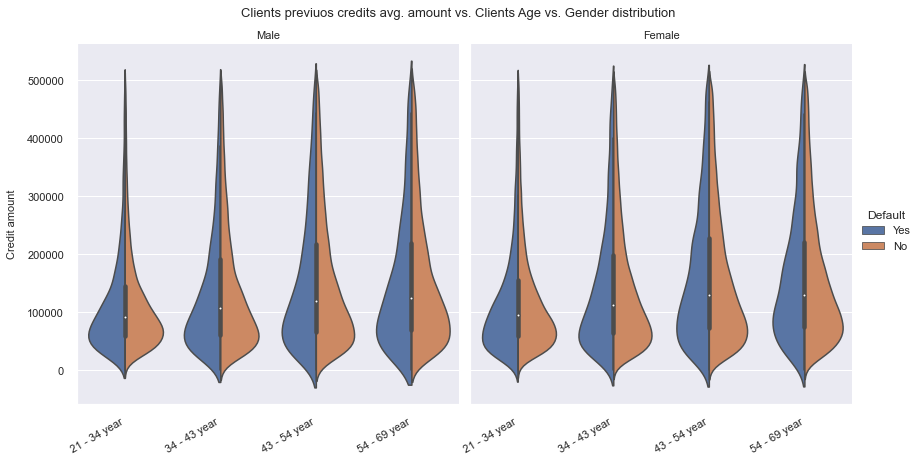

In [21]:
plot_violin(
    loans_eda[
        (loans_eda["code_gender"].isin(["M", "F"]))
        & (loans_eda["prev_cred_amt_m"] < 500000)
    ],
    "AgeRanges",
    "prev_cred_amt_m",
    "code_gender",
    x_labels,
    "Credit amount",
    subplot_titles,
    "Clients previuos credits avg. amount vs. Clients Age vs. Gender distribution",
    "Default",
    True,
    "target",
)

We can see that median is increasing the older client is and then stabilizes. No noticeable difference between genders.

**Let's analyse some basing information about what kind of clients are taking loans, what's their occupation, education and other behaviouristic indicators. We want to know who our clients really are and from which society segments they come.**

In [22]:
by_gender = (
    loans_eda[loans_eda["code_gender"].isin(["F", "M"])]
    .groupby(["code_gender", "name_contract_type"], as_index=False)
    .size()
)
by_gender["code_gender"].replace({"F": "Females", "M": "Males"}, inplace=True)

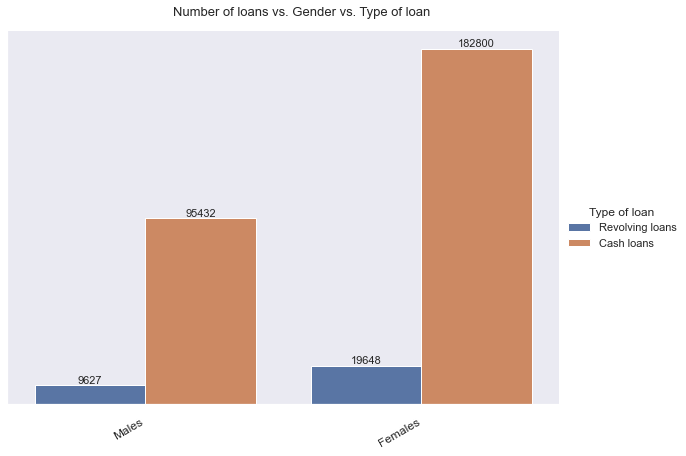

In [23]:
g = sns.catplot(
    x="code_gender",
    y="size",
    hue="name_contract_type",
    data=by_gender.sort_values(by=["code_gender", "size"], ascending=[False, True]),
    kind="bar",
    ci=None,
    height=6,
    aspect=1.5,
)

g._legend.set_title("Type of loan")

ax = g.axes.flat[0]
ax.set_xlabel("")
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        size=11,
        textcoords="offset points",
    )

ax.get_yaxis().set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=12)
g.fig.suptitle("Number of loans vs. Gender vs. Type of loan", fontsize=13, y=1.03)
plt.setp(g._legend.get_title(), fontsize=12)

plt.show()

We can see basic structure of ```Home Credit Group``` clients - ```Females``` make up almost **66** % of all clients and ```males``` - only **34 %**. Also we can see that ```Cash``` loans are way popular than ```Revolving``` loans.

In [24]:
mask = loans_eda["code_gender"].isin(["F", "M"]) & (
    loans_eda["name_family_status"] != "Unknown"
)
gender_family_status = (
    loans_eda[mask]
    .groupby(["code_gender", "AgeLabels", "name_family_status"], as_index=False)
    .size()
)
gender_family_status = gender_family_status.groupby("code_gender").apply(calc_ratio)

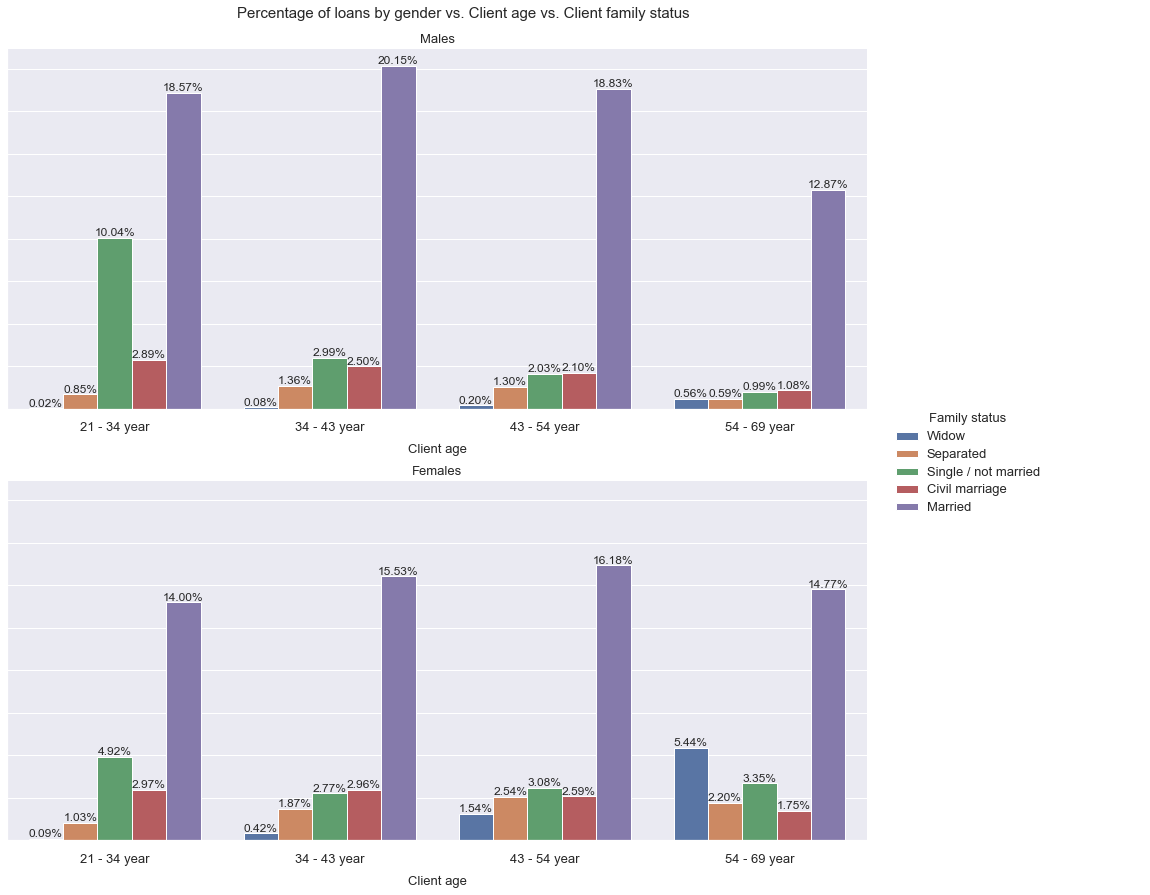

In [25]:
catplot_with_pct_3(
    gender_family_status.sort_values(by="ratio"),
    "AgeLabels",
    "ratio",
    "name_family_status",
    "code_gender",
    "Client age",
    "Family status",
    subplot_titles,
    "Percentage of loans by gender vs. Client age vs. Client family status",
)

We can see interesting distribution among ```Males``` and ```Females``` clients. ```Married``` men make up biggest percentage **among** males across all age groups except the last group - ```54 -69``` year. 10 % of **all men clients** are between ```21 and 34 year old``` and ```single```. We see other ```family status``` categories only make up between 1 - 3 % of all men clients across all age groups.\
In a ```Female``` group we see that ```Married``` women make up biggest share of all women clients, although percentage is lower compared with males, except for the oldest client group - ```54 - 69``` year. We can also see a bigger variation in ```Family status``` across all age groups.

In [26]:
bins = [0, 1, 2, 3, 4, np.inf]
loans_eda["ChildrenRanges"], loans_eda["ChildrenLabels"] = cut_sorting(
    loans_eda["cnt_children"], bins, "children"
)

In [27]:
mask = loans_eda["code_gender"].isin(["F", "M"])
gender_numb_child = (
    loans_eda[mask]
    .groupby(["code_gender", "AgeLabels", "ChildrenLabels"], as_index=False)
    .size()
)
gender_numb_child = gender_numb_child.groupby("code_gender").apply(calc_ratio)
child_order = pd.CategoricalDtype(
    ["4 or more children", "3 children", "2 children", "1 children", "0 children",],
    ordered=True,
)
gender_numb_child["ChildrenLabels"] = gender_numb_child["ChildrenLabels"].astype(
    child_order
)

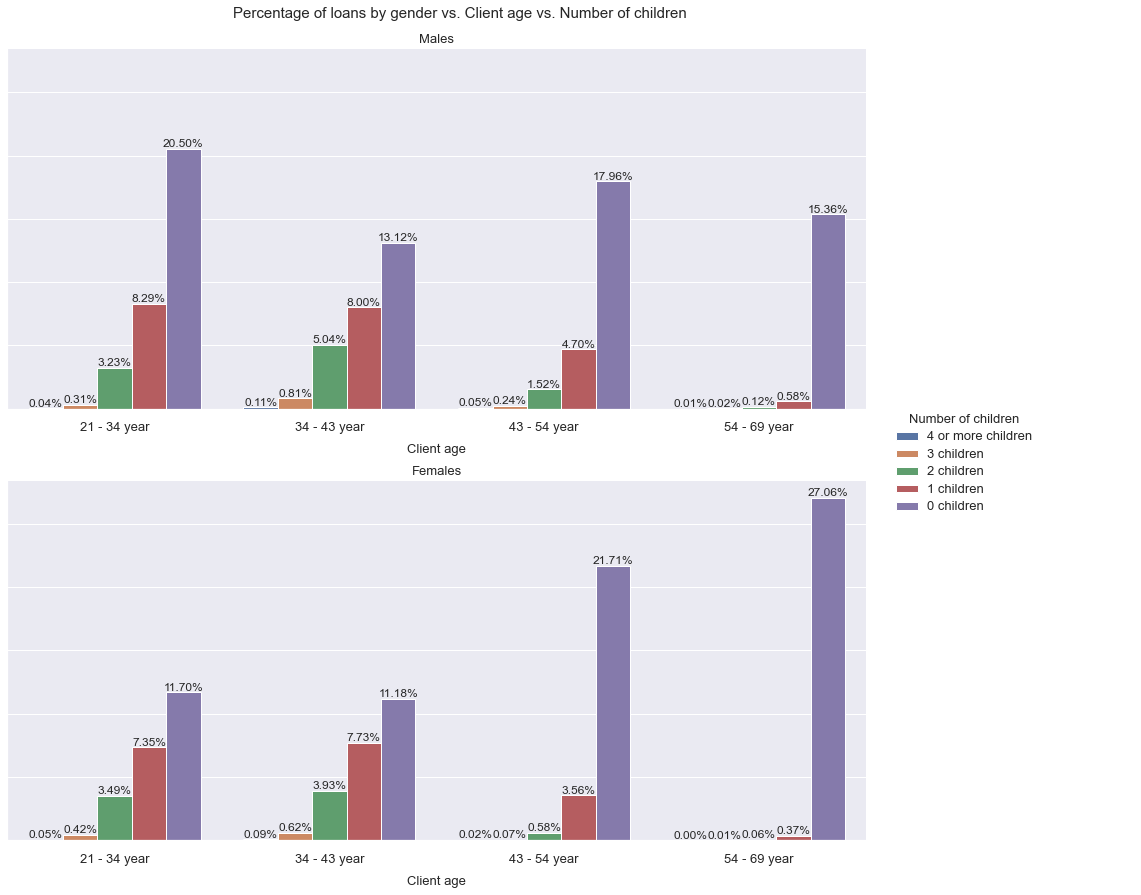

In [28]:
catplot_with_pct_3(
    gender_numb_child.sort_values(by="code_gender", ascending=False),
    "AgeLabels",
    "ratio",
    "ChildrenLabels",
    "code_gender",
    "Client age",
    "Number of children",
    subplot_titles,
    "Percentage of loans by gender vs. Client age vs. Number of children",
)

We see that ```number of children``` distributes quite evenly among ```males``` and ```females``` in their respective ```age groups```. We can notice that clients mainly have ```no children``` or only ```1 child``` at the time of application for a loan. With age, as children turns to adults, we see a decline in a number of children.

**Now, let's analyze clients education and work experience, positions, type of organization and how those indicators relate to the loans.**

In [29]:
education_loan_type = (
    loans_eda[mask]
    .groupby(
        ["code_gender", "name_education_type", "name_contract_type"], as_index=False
    )
    .size()
)
education_loan_type = education_loan_type.groupby("code_gender").apply(calc_ratio)

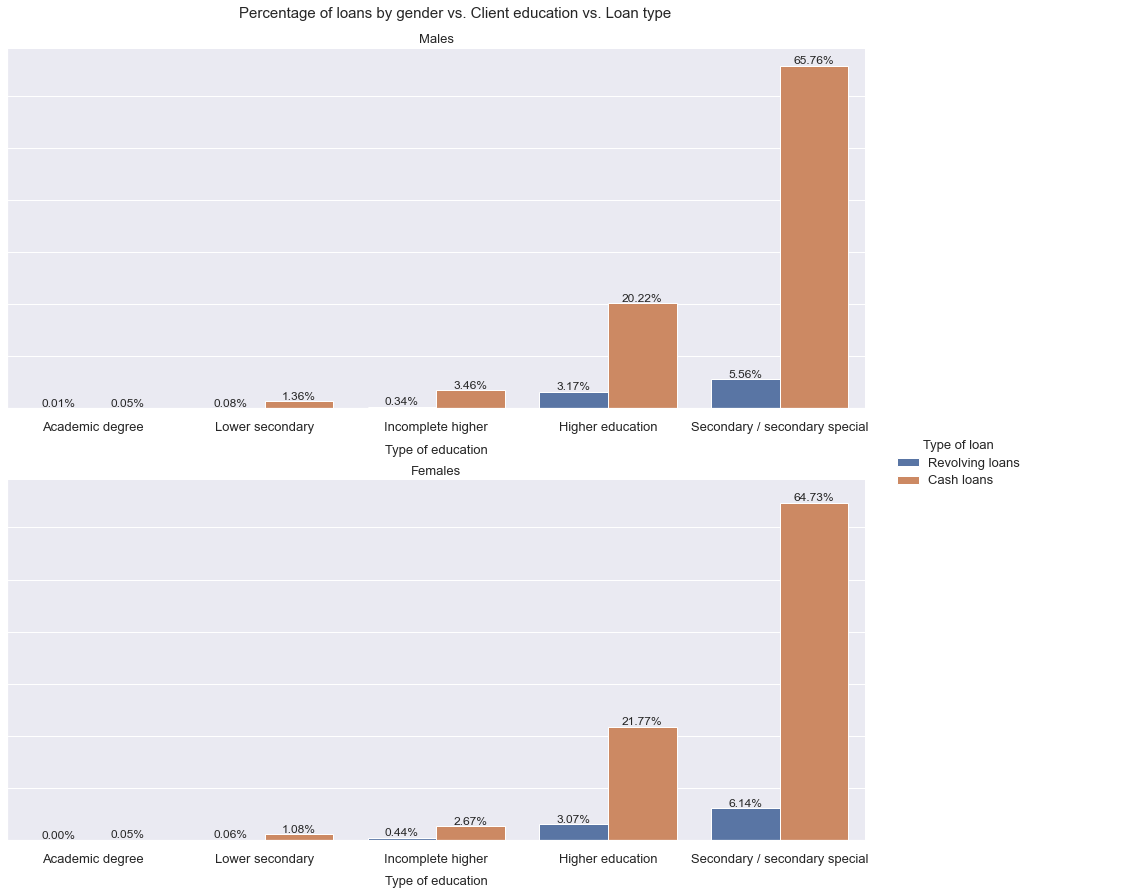

In [30]:
catplot_with_pct_3(
    education_loan_type.sort_values(
        by=["code_gender", "ratio"], ascending=[False, True]
    ),
    "name_education_type",
    "ratio",
    "name_contract_type",
    "code_gender",
    "Type of education",
    "Type of loan",
    subplot_titles,
    "Percentage of loans by gender vs. Client education vs. Loan type",
)

We can see that main education type for both males and females are ```Secondary / secondary special```, followed by ```Higher education```. We already saw that cash loans make up almost **66%** of all issued loans. Here we can see that separation by gender and by education type.

In [31]:
education_income = (
    loans_eda[mask]
    .groupby(["code_gender", "name_education_type", "name_income_type"], as_index=False)
    .size()
)
education_income = education_income.groupby("code_gender").apply(calc_ratio)
educ_order = pd.CategoricalDtype(
    ["Higher education", "Secondary / secondary special"], ordered=True,
)
education_income["name_education_type"] = education_income[
    "name_education_type"
].astype(educ_order)
incom_order = pd.CategoricalDtype(
    ["State servant", "Commercial associate", "Pensioner", "Working"], ordered=True,
)
education_income["name_income_type"] = education_income["name_income_type"].astype(
    incom_order
)

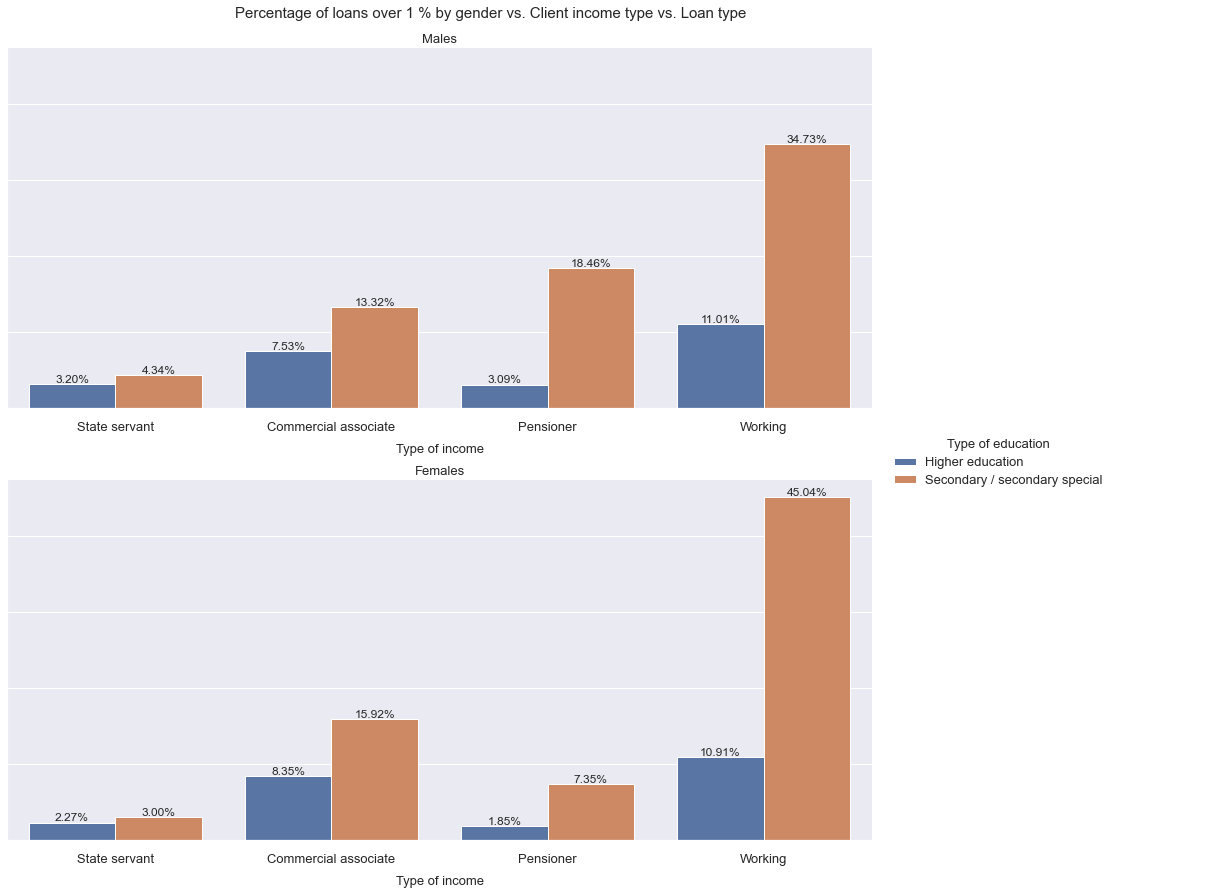

In [32]:
catplot_with_pct_3(
    education_income[education_income["ratio"] > 1],
    "name_income_type",
    "ratio",
    "name_education_type",
    "code_gender",
    "Type of income",
    "Type of education",
    subplot_titles,
    "Percentage of loans over 1 % by gender vs. Client income type vs. Loan type",
)

We can see that majority of incomes for both male and female clients come from ```work``` income, followed by ```Commercial associate``` and ```Pensioner```.

In [33]:
loans_eda["occupation_type"].fillna("Unknown", inplace=True)
edu_occup = loans_eda.groupby(["occupation_type"], as_index=False).size()
edu_occup["ratio"] = ((edu_occup["size"] / loans_eda.shape[0]) * 100).round(2)

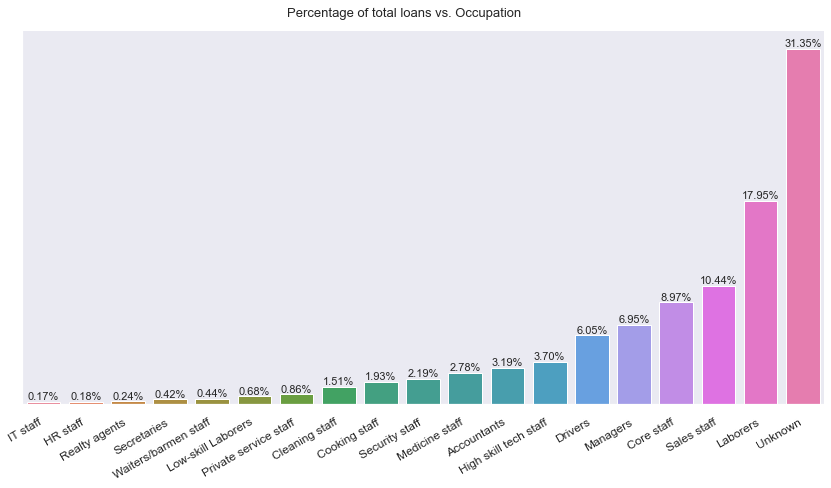

In [34]:
g = sns.catplot(
    x="occupation_type",
    y="ratio",
    data=edu_occup.sort_values(by="ratio"),
    kind="bar",
    ci=None,
    height=6,
    aspect=2,
    palette="husl",
)

ax = g.axes.flat[0]
ax.set_xlabel("")
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        size=11,
        textcoords="offset points",
    )

g.axes.flat[0].get_yaxis().set_visible(False)
g.axes.flat[0].set_xticklabels(
    g.axes.flat[0].get_xticklabels(), rotation=30, ha="right", fontsize=12
)
g.fig.suptitle("Percentage of total loans vs. Occupation", fontsize=13, y=1.03)

plt.show()

We have filled in missing values with ```Unknow``` value. We see that most popular **occupation** is ```Laborers```, ```Sales staff``` and ```Core staff```.

In [35]:
empl_len_lst = [
    "< 1 year",
    "1 year",
    "2 years",
    "3 years",
    "4 years",
    "5 years",
    "6 years",
    "7 yeas",
    "8 years",
    "9 years",
    "10 years",
    "10+ years",
]
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, np.inf]
loans_eda["EmpLengthRanges"], loans_eda["EmpLabels"] = cut_sorting(
    loans_eda[loans_eda["client_empl_length"] < 55]["client_empl_length"],
    bins,
    "children",
    empl_len_lst,
)

In [36]:
loans_eda["dti"] = round(
    loans_eda["amt_annuity"] / loans_eda["amt_income_total"] * 100, 2
)
loans_eda["loans_term_months"] = round(
    loans_eda["amt_credit"] / loans_eda["amt_annuity"]
)

In [37]:
empl_len_stats = (
    loans_eda[mask]
    .groupby(["code_gender", "EmpLabels"], as_index=False)
    .agg({"amt_credit": "mean"})
)

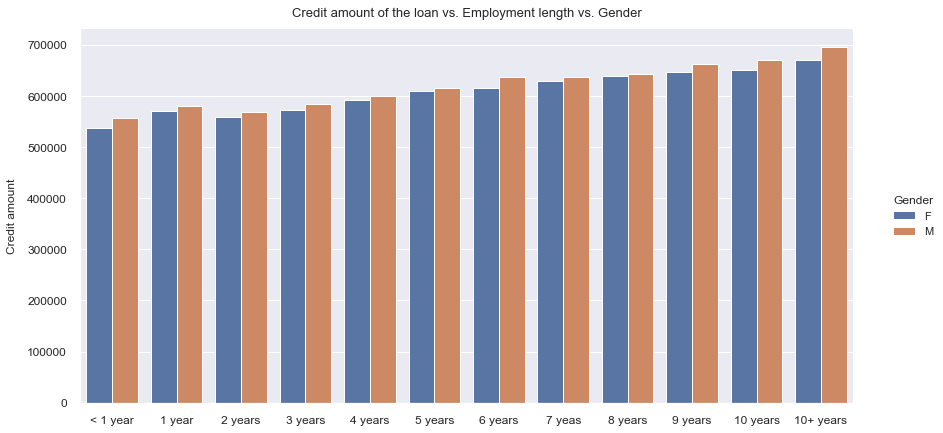

In [38]:
cat_plot(
    empl_len_stats.sort_values(by="code_gender"),
    "EmpLabels",
    "amt_credit",
    "Credit amount",
    "Gender",
    "Credit amount of the loan vs. Employment length vs. Gender",
    "code_gender",
)

We can see that there is no big difference between gender and loan amount, although we see positive coorelation between work experience and loan amount taken.

In [39]:
emp_len_own_realty = loans_eda.groupby(
    ["EmpLabels", "flag_own_realty"], as_index=False
).size()
emp_len_own_realty = emp_len_own_realty.groupby("EmpLabels").apply(calc_ratio)

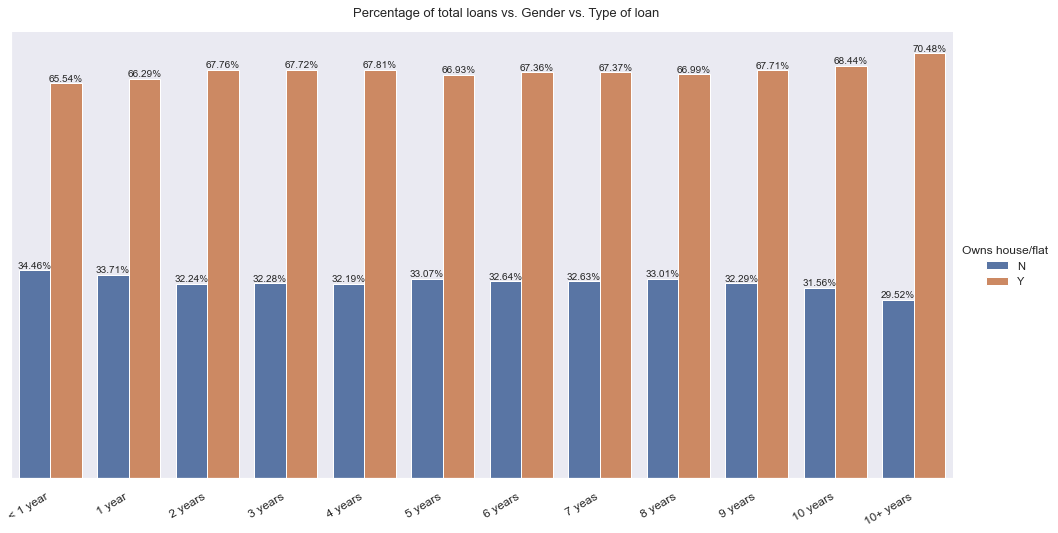

In [40]:
catplot_with_pct(
    emp_len_own_realty,
    "EmpLabels",
    "ratio",
    "flag_own_realty",
    "Owns house/flat",
    "Percentage of total loans vs. Gender vs. Type of loan",
)

From this graph we can see that number of clients who owns house or flat increases the longer they work. Although it is interesting that **65%** clients with less than 1 year work experience already owns any kind of real estate. 

**Now let's check on how our clients features interact with our target - default loan or not.**

In [41]:
occup_default = loans_eda.groupby(["target", "occupation_type"], as_index=False).size()
occup_default = occup_default.groupby("occupation_type").apply(calc_ratio)

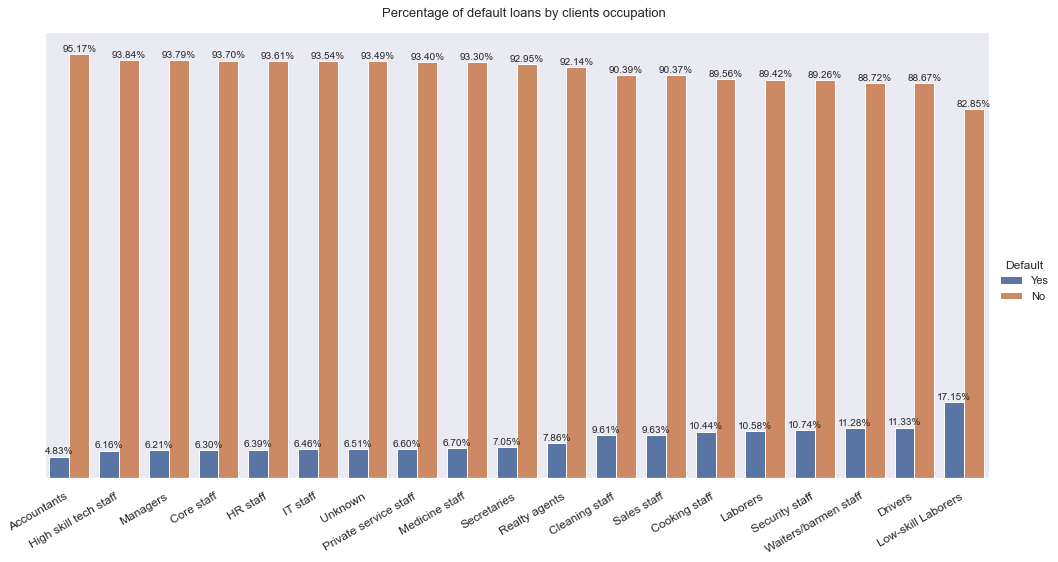

In [42]:
catplot_with_pct(
    occup_default.sort_values(by="ratio"),
    "occupation_type",
    "ratio",
    "target",
    "Default",
    "Percentage of default loans by clients occupation",
)

We see quite interesting trend here. "Safest" occupation being ```Accountants``` (they know how to count money), ```High skill tech staff``` and ```Managers```. On the opposite side working as ```Low-skill Laborers```, ```Drivers``` and ```Waiters/barmen staff``` increases client probability of not paying a loan in time.

In [43]:
occup_gender = (
    loans_eda[mask]
    .groupby(["code_gender", "target", "occupation_type"], as_index=False)
    .size()
)
occup_gender = occup_gender.groupby(["code_gender", "occupation_type"]).apply(
    calc_ratio
)

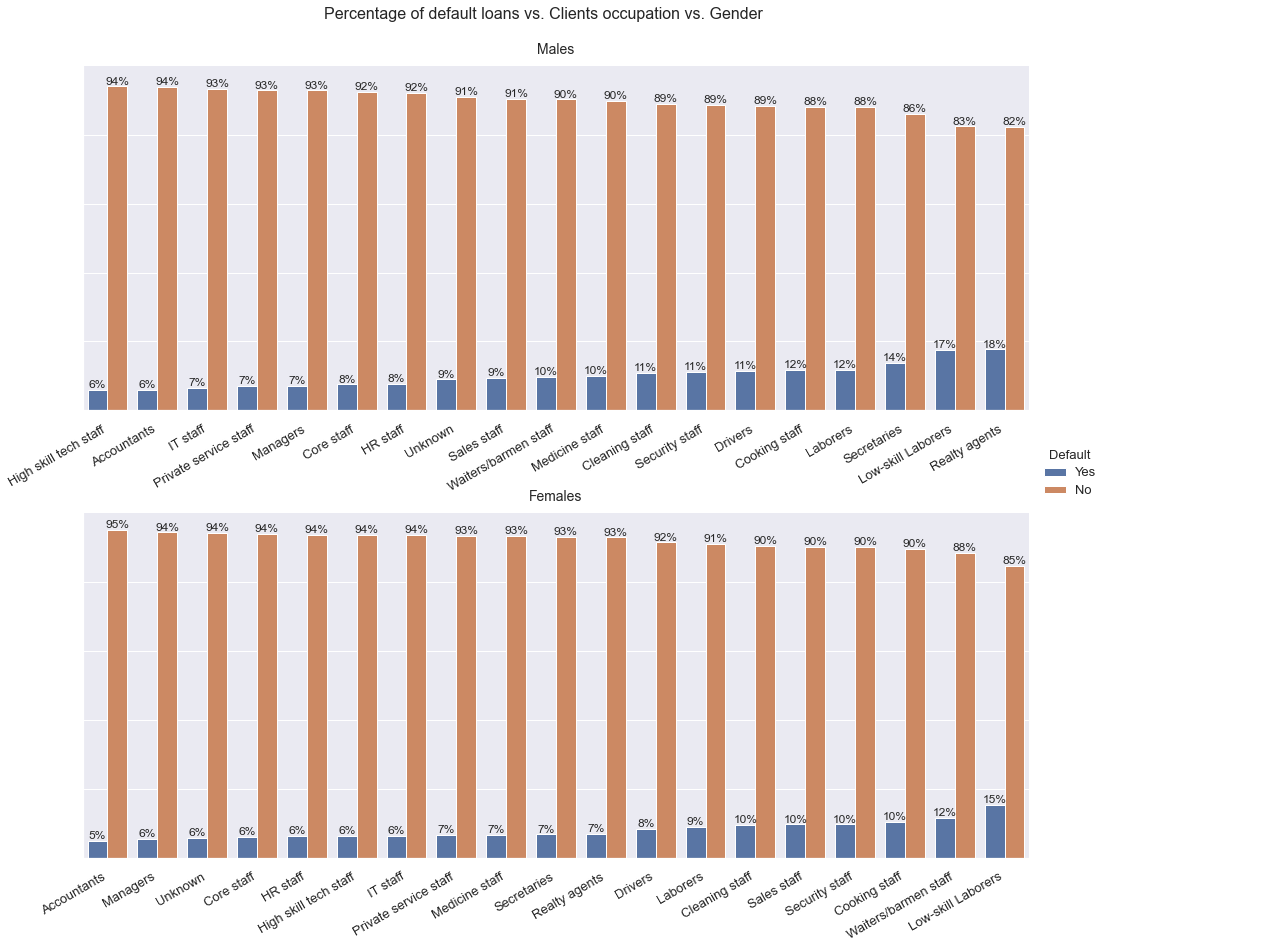

In [44]:
catplot_with_pct_4(
    occup_gender.sort_values(by=["code_gender", "ratio"], ascending=[False, True]),
    "occupation_type",
    "ratio",
    "target",
    "code_gender",
    "Default",
    subplot_titles,
    "Percentage of default loans vs. Clients occupation vs. Gender",
)

When we analyse clients by ```gender``` we see that ```occupation_type``` differs from the previous graph where we didn't divide clients by gender.\
"Safest" occupations for men clients are - ```High skill tech staff```, ```Accountants``` and ```IT staff```. On the other hand - working as ```Realty agent```, ```Low-skill laborer``` or ```Secretaries``` can result in highest probability of ```default```.\
For a women "safest"occupations are ```Accountants```, ```Managers``` and ```Unknown``` (our created category from missing values). Working as ```Low-skill laborer```, ```Waiters/barmen``` or ```Cooking staff``` result in the highest probability of ```default```.

In [45]:
default_child = loans_eda.groupby(["ChildrenLabels", "target"], as_index=False).size()
default_child = default_child.groupby("ChildrenLabels").apply(calc_ratio)

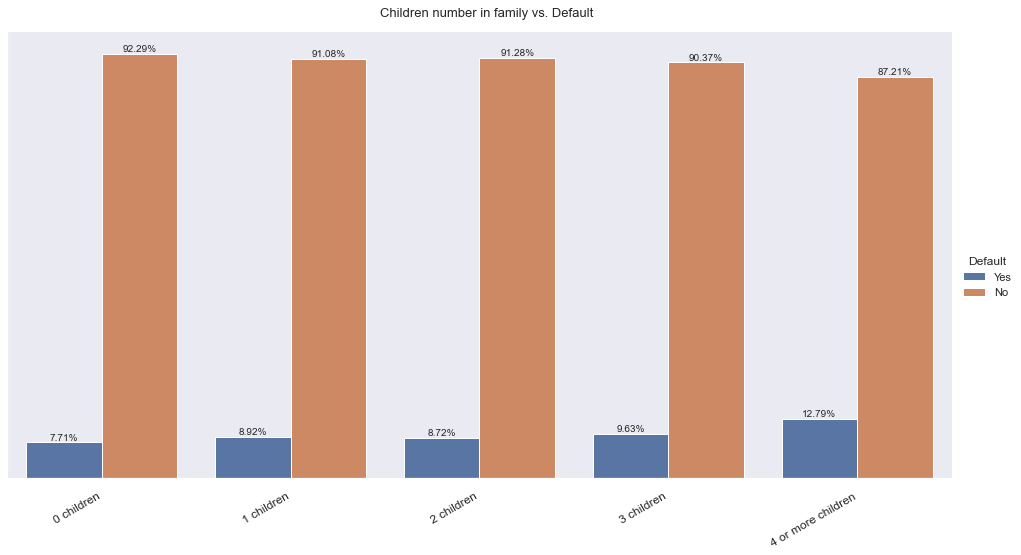

In [46]:
catplot_with_pct(
    default_child.sort_values(by="ratio"),
    "ChildrenLabels",
    "ratio",
    "target",
    "Default",
    "Children number in family vs. Default",
)

We can see that children number does increase a probability of ```default``` loan.

In [47]:
weekday_default = loans_eda.groupby(
    ["weekday_appr_process_start", "target"], as_index=False
).size()
weekday_default = weekday_default.groupby("weekday_appr_process_start").apply(
    calc_ratio
)
days_order = pd.CategoricalDtype(
    ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"],
    ordered=True,
)
weekday_default["weekday_appr_process_start"] = weekday_default[
    "weekday_appr_process_start"
].astype(days_order)

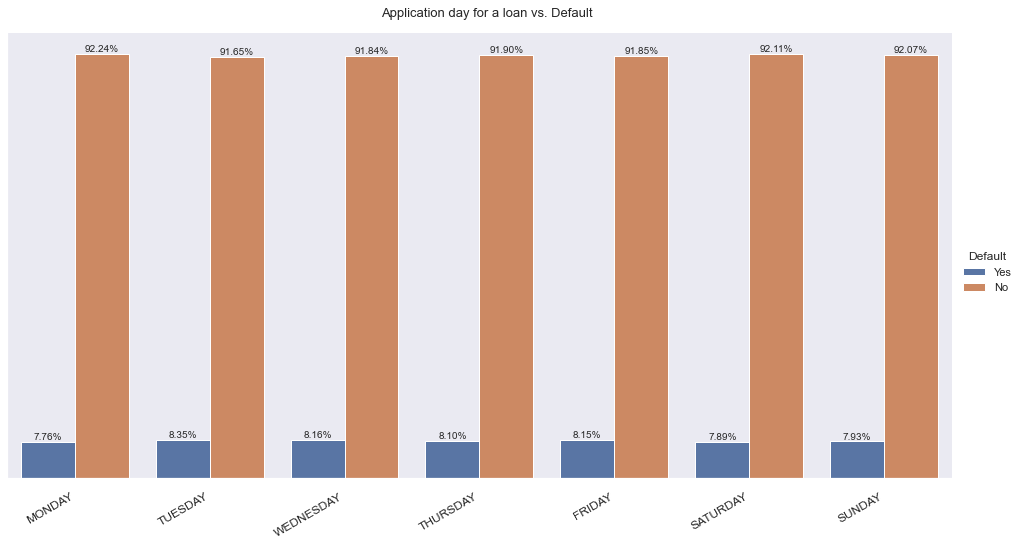

In [48]:
catplot_with_pct(
    weekday_default.sort_values(by="ratio"),
    "weekday_appr_process_start",
    "ratio",
    "target",
    "Default",
    "Application day for a loan vs. Default",
)

We can see that weekday of applying for loan does not have influence on an event of ```default```.\
Now, let's analyse a subset of clients with occupations which result in most ```default``` cases.

In [49]:
occupations = [
    "Low-skill Laborers",
    "Drivers",
    "Waiters/barmen staff",
    "Security staff",
    "Laborers",
]

In [50]:
occup_subset = loans_eda[loans_eda["occupation_type"].isin(occupations)]
all_other = loans_eda[~loans_eda["occupation_type"].isin(occupations)]

In [51]:
family_risky = occup_subset.groupby(
    ["name_family_status", "target"], as_index=False
).size()
family_risky = family_risky.groupby("name_family_status").apply(calc_ratio)
family_other = (
    all_other[all_other["name_family_status"] != "Unknown"]
    .groupby(["name_family_status", "target"], as_index=False)
    .size()
)
family_other = family_other.groupby("name_family_status").apply(calc_ratio)
family_risky.insert(0, "risky_occupation", "Yes")
family_other.insert(0, "risky_occupation", "No")
family_risky_other = pd.concat([family_risky, family_other])

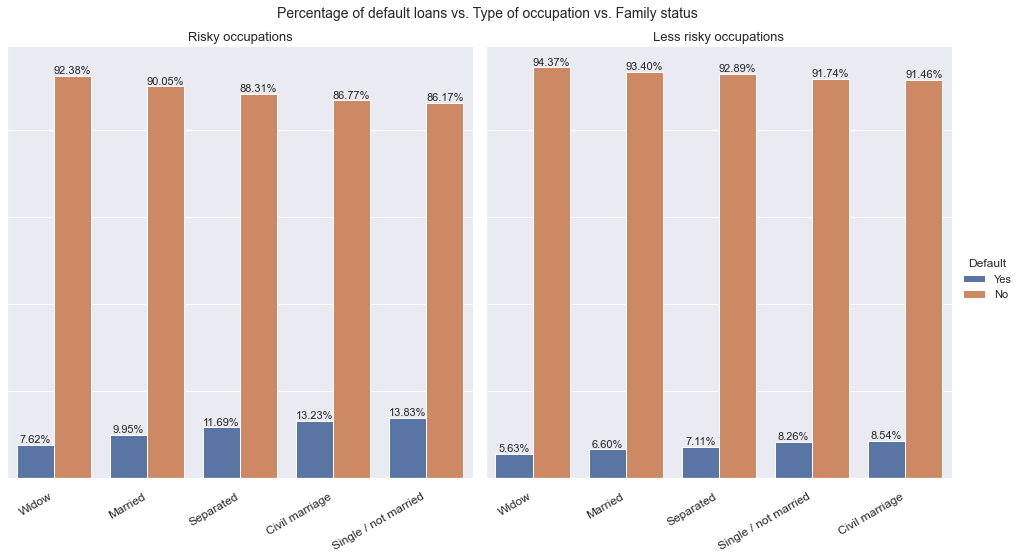

In [52]:
catplot_with_pct_2(
    family_risky_other.sort_values(
        by=["risky_occupation", "ratio", "target"], ascending=[False, True, True]
    ),
    "name_family_status",
    "ratio",
    "target",
    "risky_occupation",
    "Default",
    ["Risky occupation", "Less risky occupation"],
    "Percentage of default loans vs. Type of occupation vs. Family status",
)

We can see that that there is from **3 to 5 % increase** in ```default``` among different ```family_status``` groups and belonging to risky occupations (Low-skill Laborers, Drivers, Waiters/barmen staff, Security staff, Laborers) versus having less risky occupation.

In [53]:
child_risky = occup_subset.groupby(["ChildrenLabels", "target"], as_index=False).size()
child_risky = child_risky.groupby("ChildrenLabels").apply(calc_ratio)
child_other = all_other.groupby(["ChildrenLabels", "target"], as_index=False).size()
child_other = child_other.groupby("ChildrenLabels").apply(calc_ratio)
child_risky.insert(0, "risky_occupation", "Yes")
child_other.insert(0, "risky_occupation", "No")
child_risky_other = pd.concat([child_risky, child_other])

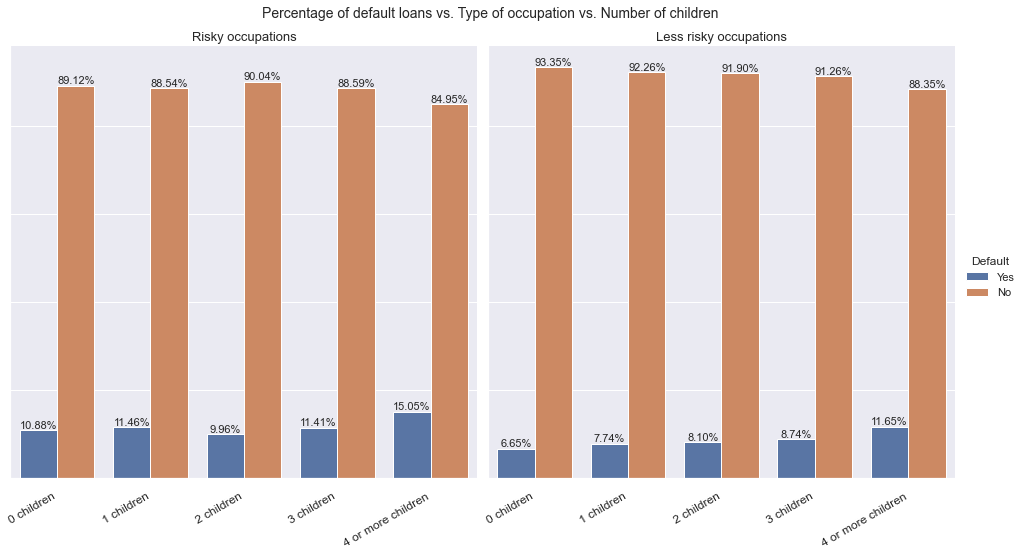

In [54]:
catplot_with_pct_2(
    child_risky_other.sort_values(
        by=["risky_occupation", "ratio", "target"], ascending=[False, True, True]
    ),
    "ChildrenLabels",
    "ratio",
    "target",
    "risky_occupation",
    "Default",
    ["Risky occupation", "Less risky occupation"],
    "Percentage of default loans vs. Type of occupation vs. Number of children",
)

We can see moreless same tendency as in previuos plot, where ```risky``` occupations have increased ratio when taking ```number of children``` into account. 

**Let's also analyze what kind of loans were defaulted e.g. term, amount and other indicators.**

In [55]:
loan_type = loans_eda.groupby(["target", "name_contract_type"], as_index=False).size()
loan_type = loan_type.groupby("name_contract_type").apply(calc_ratio)

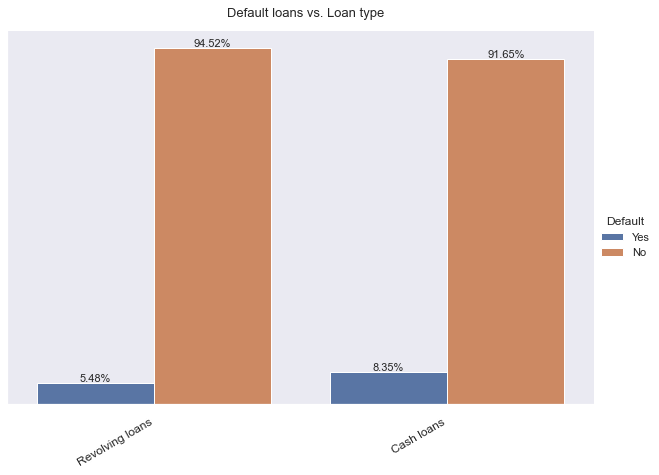

In [56]:
small_catplot(
    loan_type.sort_values(by=["target", "ratio"], ascending=[False, True]),
    "name_contract_type",
    "ratio",
    "target",
    "Default",
    "Default loans vs. Loan type",
)

We can see that ```Cash loans``` have appr. 3 % higher ```default``` rate than ```Revolving loans```.

In [57]:
loans_eda["TermRanges"], loans_eda["TermLabels"] = quartiles_sorting(
    loans_eda["loans_term_months"], "months"
)
loans_eda["AmountCreditRanges"], loans_eda["AmountCreditLabels"] = quartiles_sorting(
    loans_eda["amt_credit"], ""
)

In [58]:
term_amount = loans_eda.groupby(["target", "TermLabels"], as_index=False).size()
term_amount = term_amount.groupby(["TermLabels"]).apply(calc_ratio)

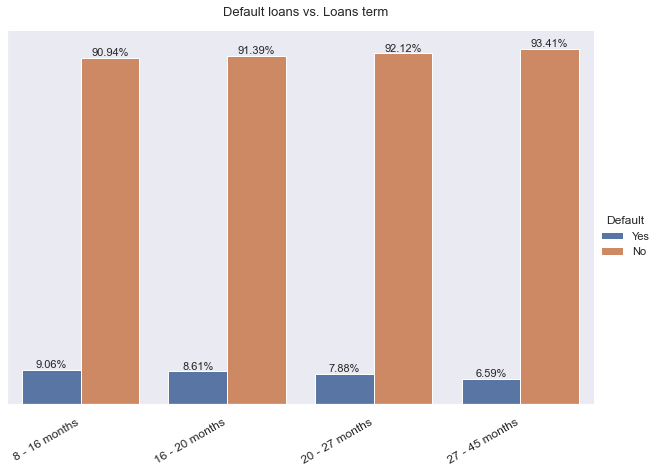

In [59]:
small_catplot(
    term_amount.sort_values(by=["target", "ratio"], ascending=[False, True]),
    "TermLabels",
    "ratio",
    "target",
    "Default",
    "Default loans vs. Loans term",
)

As we can see loan term has slight effect on ```default``` - shorter loans have more tendency to get ```default```, although difference is not big.

In [60]:
credit = loans_eda.groupby(["target", "AmountCreditLabels"], as_index=False).size()
credit = credit.groupby(["AmountCreditLabels"]).apply(calc_ratio)

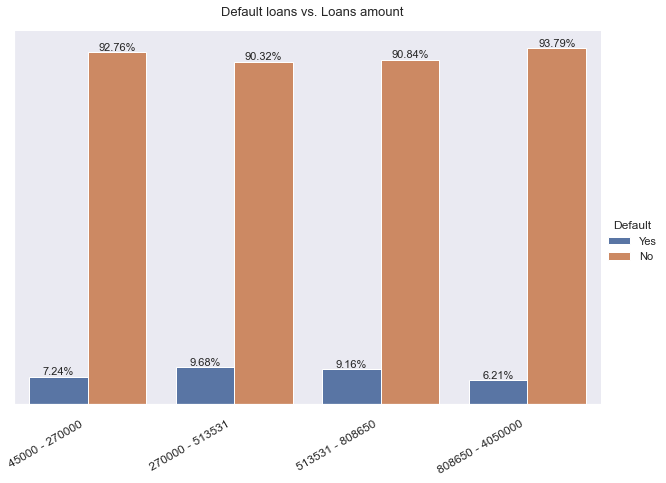

In [61]:
small_catplot(
    credit.sort_values(by=["target", "ratio"], ascending=[False, True]),
    "AmountCreditLabels",
    "ratio",
    "target",
    "Default",
    "Default loans vs. Loans amount",
)

Interesting, that bigger loans have **lowest** ```default``` rate. Quite possible that clients taking bigger loans are more financially educated and their monthly incomes are higher. In the second place by **lowest** ```default``` ratio are **smallest** loans by **amount.**

Let's check numerical features corelation with a target and each other too.

In [62]:
loans_eda["num_target"] = loans_eda["target"].replace({"Yes": 1, "No": 0})

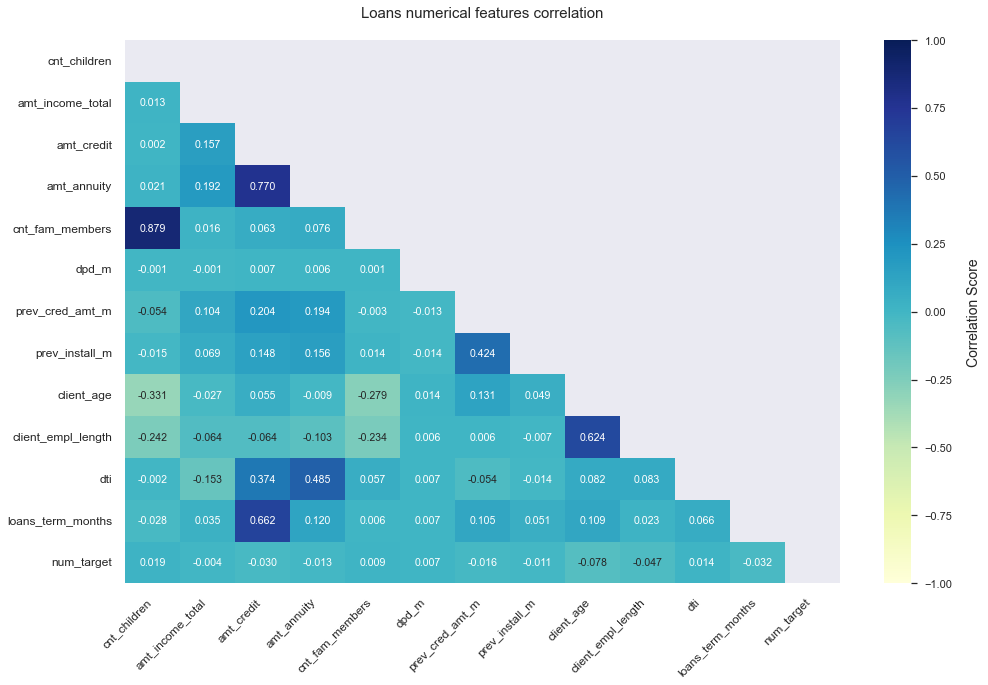

In [63]:
heat_map(
    loans_eda.corr(),
    "Loans numerical features correlation",
    "Correlation Score",
    (16, 10),
    cmap="YlGnBu",
)

From correlation heatmap we can see that our analysed features have low correlation with a target. We have some strong correlation between a features - e.g. size of ```family``` positively correlates with a number of ```children``` in a family. Also ```loans term``` and monthly ```annuity amount``` positively correlates with credit size. We can also see that the **older** the client the **bigger** his employment length is.

Let's calculate ```Cramer's V``` statistic for categorical-categorical association. ```Cramer's V``` is based on a nominal variation of Pearson’s Chi-Square Test and measures association strength between two categorical variables.

In [64]:
cat_cols = [col for col in loans_eda.select_dtypes("object")]
subset_cram = loans_eda.loc[:, cat_cols]
cramers_corr = nominal.compute_associations(subset_cram)

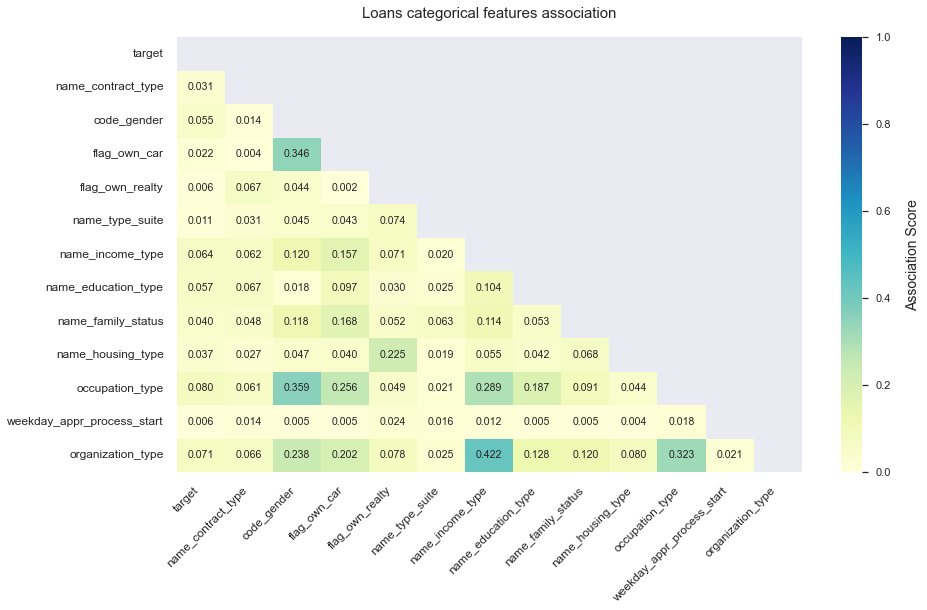

In [65]:
heat_map(
    cramers_corr,
    "Loans categorical features association",
    "Association Score",
    (14, 8),
    vmin=0,
    cmap="YlGnBu",
)

Cramer's association between 0.3 and 0.5 is considered moderate, and association bigger than 0.5 is considered to be strong.\
From the heat map we see that association with a target is low. We have moderate association between features, such as - ```having a car or not``` or ```occupation_type``` associaties with ```gender```. Also ```name_income_type``` associates with ```organization_type```.

## **Inferential Statistical Analysis**<a name="inf"></a>

### Hypothesis Testing

We are interested in knowing **whether there is a statistically significant difference between proportion of males who have 1 child in their family and females who have 1 child in their family default proportions.**

**Null Hypothesis: $H_0$** - There is no difference in proportions of ```default``` loans between ```males who have 1 child``` and ```females who have one child```.   
**Alternative Hypothesis: $H_a$** - There is a difference in ```males who have 1 child``` and ```females who have 1 child``` default loan proportions.  
**Significance level: 0.05**

In [66]:
males_1_child_count = loans_eda[
    (loans_eda["code_gender"] == "M")
    & (loans_eda["cnt_children"] == 1)
    & (loans_eda["target"] == "Yes")
].shape[0]
females_1_child_count = loans_eda[
    (loans_eda["code_gender"] == "F")
    & (loans_eda["cnt_children"] == 1)
    & (loans_eda["target"] == "Yes")
].shape[0]
males_sample_size = loans_eda[
    (loans_eda["code_gender"] == "M") & (loans_eda["cnt_children"] == 1)
].shape[0]
females_sample_size = loans_eda[
    (loans_eda["code_gender"] == "F") & (loans_eda["cnt_children"] == 1)
].shape[0]

In [67]:
two_proportions_ztest(
    [males_1_child_count, females_1_child_count],
    [males_sample_size, females_sample_size],
)

(9.86679060087567, 5.79903916240489e-23)

Let's double check results with statmodels library two proportions ztest too.

In [68]:
successes = np.array([males_1_child_count, females_1_child_count])
samples = np.array([males_sample_size, females_sample_size])
stat, p_value = sm.stats.proportions_ztest(
    count=successes, nobs=samples, alternative="two-sided"
)
stat, p_value

(9.86679060087567, 5.79903916240489e-23)

We see that our Z statistic is very big, and p-value is equal to 0, that means it is lower than our  ```Significance level``` we set up earlier.\
Thus we **do have enough strong evidence** to reject our Null Hypothesis and state that there is statistically significant difference in ```males who have 1 child``` and ```females who have 1 child``` default loans proportions.

We are also interested if there is a **significant difference in ```client_age``` means between clients who ```defaulted``` loan and clients who did not.**

**Null Hypothesis: $H_0$** - There is no difference in clients age means between clients who defaulted loan and clients who did not.\
**Alternative Hypothesis: $H_a$** - There is a difference in clients age means between those clients groups.  
**Significance level: 0.05**

As true standard deviation of the population (**σ**) is **unknown**, so we are going to use a **t-test.**

In [69]:
clients_age_default = loans_eda[loans_eda["target"] == "Yes"]["client_age"]
clients_age_not_default = loans_eda[loans_eda["target"] == "No"]["client_age"]

In [70]:
t_score, p_value_t, _ = sm.stats.ttest_ind(clients_age_default, clients_age_not_default)
print(f"{t_score:.10f}, {p_value_t:.20f}")

-43.5331709465, 0.00000000000000000000


As we see, our difference in sample means is **-43** (estimated) standard errors below the **Null Hypothesis** difference of 0 (that means are equal). As our **p-value** is much smaller than our significance level of 0.05, a probability of observing such large test statistic just by chance is **very unlikely**. We **have strong evidence** against **Null Hypothesis**, thus we reject the null and state that means are different.

**Sampling and Permutation tests**

Let's do clients who default loan and the ones who don't  ```clients_age``` sampling with 95 % confidence intervals and check how our sampled means between those clients groups differ from actual mean difference and confidence intervals.

In [71]:
mean_diff, lcb, ucb = diff_in_two_means_unpooled_ci(
    clients_age_default, clients_age_not_default
)
print(
    f"""Difference in two means: {mean_diff:.3f},
Lower CI bound: {lcb:.3f},
Upper CI bound: {ucb:.3f}"""
)

Difference in two means: -3.437,
Lower CI bound: -3.590,
Upper CI bound: -3.284


In [72]:
actual_mean_diff, mean_diff, lcb, ucb = sampling_mean_diff_ci(
    clients_age_default, clients_age_not_default, 500
)
print(
    f"""Actual difference of two means: {actual_mean_diff:.3f},
Mean of sampled difference of two means:{mean_diff.mean():.3f},
Sampled lcb: {lcb:.3f},
Sampled ucb: {ucb:.3f}"""
)

Actual difference of two means: -3.437,
Mean of sampled difference of two means:-3.438,
Sampled lcb: -3.583,
Sampled ucb: -3.297


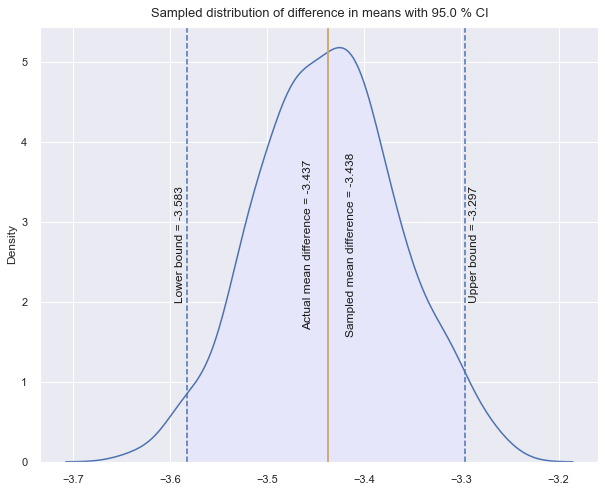

In [73]:
plot_mean_diff_conf_int(mean_diff, lcb, actual_mean_diff, ucb)

As we see after sampling 500 samples and plotting them, actual mean difference and sampled mean difference are close to each other as well as sampled confidence intervals and confidence intervals computed with ```diff_in_two_means_unpooled_ci``` function. These results let us make a conclusion that our results are quite robust. Now, let's also do a permutation test.

In [74]:
perm_diffs = [
    perm_test(clients_age_default, clients_age_not_default) for _ in range(200)
]

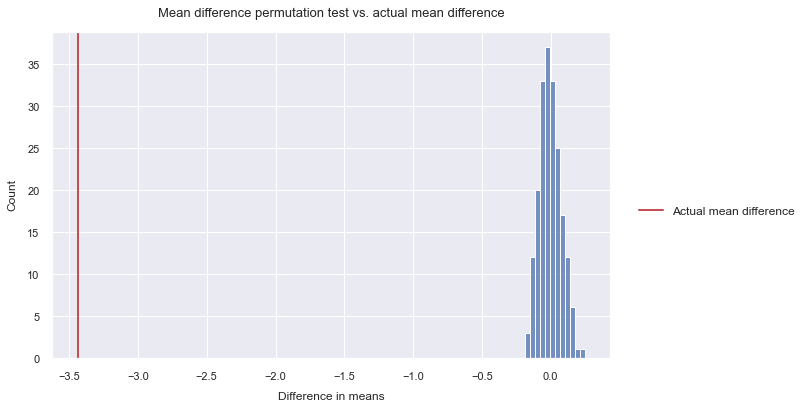

In [75]:
plot_perm_diffs(
    perm_diffs,
    actual_mean_diff,
    "Mean difference permutation test vs. actual mean difference",
)

We see from the chart, that actual mean difference lies far one the left side of distribution, confirming our earlier results of large ```t score``` and small ```p-value``` in our Hypothesis testing of difference in two means.

## **Machine Learning**<a name="ml"></a>

### Predicting whether loan going to be defaulted

**Model Evaluation and Decision Rule Metrics**

For a model which is going to predict whether client is going to default loan or not, we want to predict probabilities and label them according to some threshold provided by the stakeholders, managers or any other decision maker.\
Firstly, for the evaluation of different models we are going to use **average precision** score, which summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight. So, basically, it's a one of several ways to calculate area under Precision-Recall curve (PR AUC).\
Then, for our model to be effective, we are going to optimize threshold of Precision-Recall curve to label our probabilities according to some arbitrary **recall** value as ```False Negatives``` are more important for our decision makers.

**Preparing a data sets**

First we are going to drop rare categories with less than 10 instances in a categorical features, then drop id column and replace anomaly in ```days_employed``` feature with nan values, which we are going to impute later.

In [76]:
for col in application_train.select_dtypes(exclude="number"):
    value_counts = application_train[col].value_counts()
    cats_to_drop = [cat for cat in value_counts.index if value_counts[cat] < 10]
    application_train.drop(
        index=application_train[application_train[col].isin(cats_to_drop)].index.values,
        inplace=True,
    )
print(f"{len(cats_to_drop)} categories dropped")
application_train.drop("sk_id_curr", axis=1, inplace=True)
application_train["days_employed"] = application_train["days_employed"].replace(
    {365243: np.nan}
)
application_train.columns = [col.replace(" ", "_") for col in application_train.columns]
application_train.columns = [
    re.sub("[^A-Za-z0-9_]+", "", col) for col in application_train.columns
]

3 categories dropped


In [77]:
data = application_train.drop("target", axis=1)
target = application_train["target"].copy()

In [78]:
target.value_counts()

0    282668
1     24821
Name: target, dtype: int64

We see our classes are a heavily inbalanced, target class being a minority.

In [79]:
rnd = 42

In [80]:
full_train_data, full_test_data, full_train_target, full_test_target = train_test_split(
    data, target, test_size=0.3, stratify=target, random_state=rnd
)

In [81]:
len(data.isnull().sum()[data.isnull().sum() > 0])

620

We see that a lot of features contain missing values. As missing values size is not big compared with the size of whole data set, we can treat that those values are MCAR (Missing completely at random). Let's check if our assumption is true with ```missingno``` package.\
As we have a lot features with just several missing values, let’s check missing values distribution in a features which have at least 15 % of missing values.

In [82]:
mask = ((data.isnull().sum() / data.shape[0]) * 100) >= 30
miss_value_col = [col for col in mask.index if mask[col] == True]

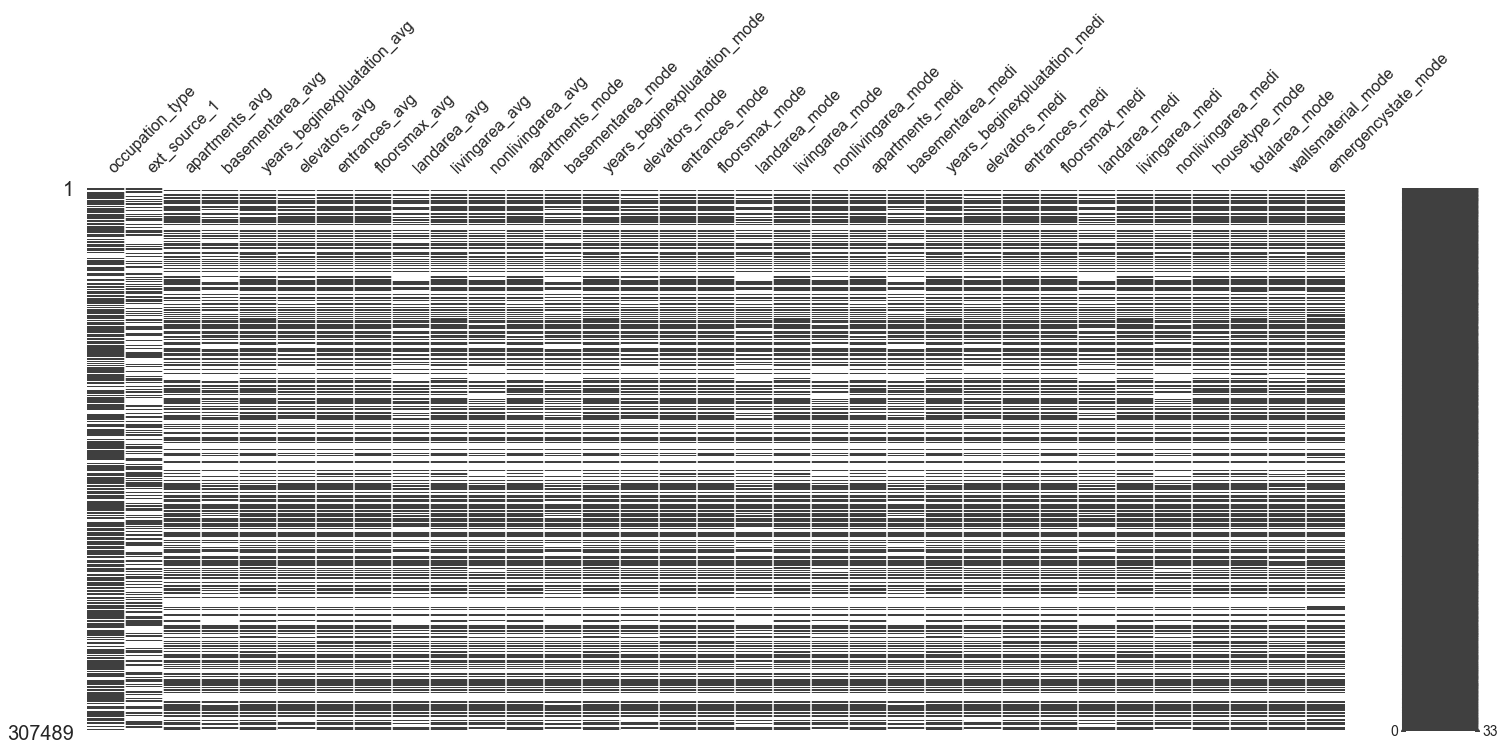

In [83]:
msno.matrix(data[miss_value_col])

plt.show()

We see that missing values are scattered completely randomly in the dataset.

### **Data pre-processing and feature engineering**

For pre-processing, feature engineering and model evaluation stages we are going to take a small amount of data to speed things up and later we are going to train and test final model on the whole data set.

In [84]:
idx_train = 40000
idx_test = 10000
min_train_data, min_test_data, min_train_target, min_test_target = (
    full_train_data.iloc[:idx_train, :],
    full_test_data.iloc[:idx_test, :],
    full_train_target.iloc[:idx_train],
    full_test_target.iloc[:idx_test],
)

**Dealing with missing values in numerical and categorical features**

Let's find out which imputation methods for numerical and categorical features yeild best results for our chosen metric.

In [85]:
numeric_columns = [
    col for col in min_train_data.select_dtypes("number") if col in miss_value_col
]
for col in [
    "cnt_children",
    "amt_income_total",
    "amt_annuity",
    "amt_credit",
    "amt_goods_price",
    "days_registration",
    "region_population_relative",
    "days_birth",
    "days_registration",
    "days_id_publish",
]:
    numeric_columns.append(col)

In [87]:
clf_dict = dict(class_weight="balanced", random_state=rnd, n_jobs=-1)

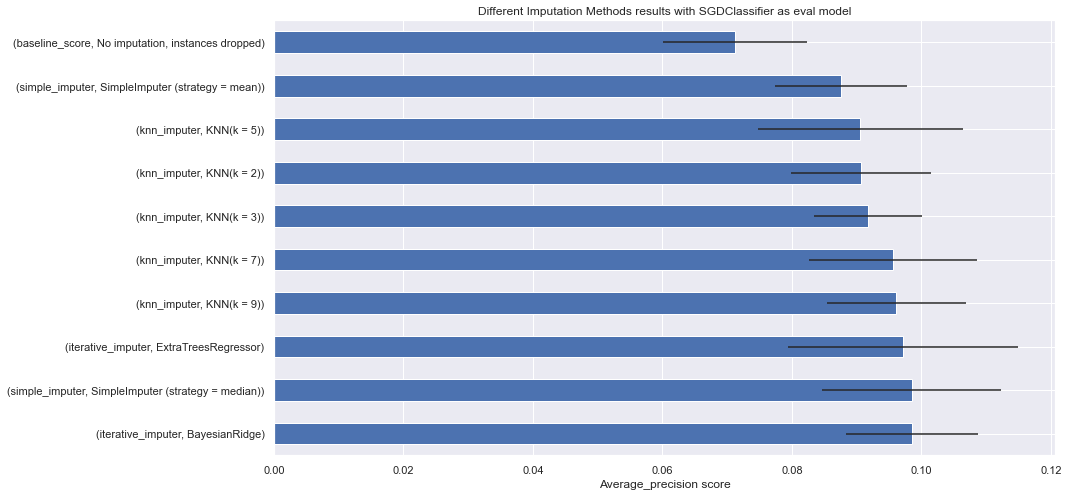

In [86]:
numeric_imputation_search(
    min_train_data[numeric_columns][:3000],
    min_train_target[:3000],
    SGDClassifier(**clf_dict),
    rnd,
    "average_precision",
)

We can see various imputation methods results on our sample of 3000 instances. As our data set is big, we need a fast imputation method, thus we will go with simpleimputer and strategy ```median```. We will revisit best imputation method after feature selection is done and our data set dimensionality is reduced.

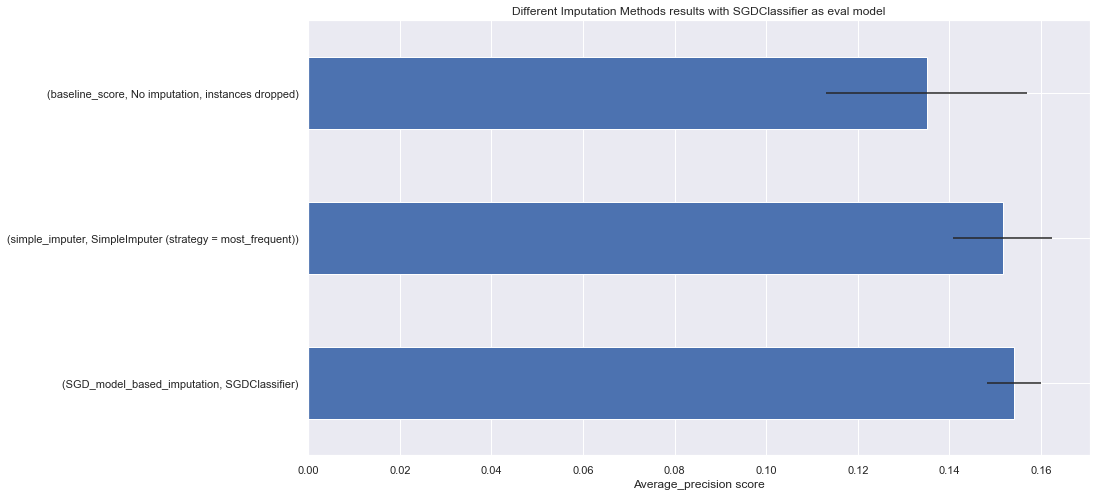

In [87]:
categorical_imputation_search(
    min_train_data, min_train_target, SGDClassifier(**clf_dict), "average_precision",
)

For categorical features we can see that different imputation methods yielded quite similar results, although model based imputation method resulted in smaller standard deviation. Again we wll choose simpler method for this stage - SimpleImputer with ```mode``` imputation.

**Optimizing pre-processing pipeline with Optuna**

We will run hp optimization for our pre-processing pipeline, to find which scalers, encoders and clustering methods to use.

In [88]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=rnd)

In [89]:
cat_columns = []
for cat_col in min_train_data.columns:
    if (
        min_train_data[cat_col].nunique() < 3
        or min_train_data[cat_col].dtype == "object"
    ) and (
        cat_col.split("_")[-1] not in ["min", "max", "mean", "count", "unique", "norm",]
    ):
        cat_columns.append(cat_col)
num_columns = [
    num_col
    for num_col in min_train_data.select_dtypes("number")
    if num_col not in cat_columns
]
num_columns_idx = list(range(len(num_columns)))
cat_columns_idx = list(range(len(num_columns), (len(cat_columns + num_columns))))

In [90]:
num_pipe = Pipeline([("numeric_imp", SimpleImputer(strategy="median"))])
cat_pipe = Pipeline([("categorical_imp", SimpleImputer(strategy="most_frequent"))])
prepro_opt_pipe = Pipeline(
    [
        (
            "union",
            ColumnTransformer(
                [
                    ("numeric", num_pipe, num_columns),
                    ("categorical", cat_pipe, cat_columns),
                ]
            ),
        ),
    ],
)

In [91]:
min_train_data_tr = prepro_opt_pipe.fit_transform(min_train_data)

After running pre-processing pipeline optimization with Optuna we came with a parameters bellow. We will use them to construct our final pipeline for modelling and model's hyper parameter optimization.

"scalers": "minmax",\
"cat_encoders": "one_hot",\
"clustering": "KMeans",\
"num_of_clusters": 7,\
"class_weights": "balanced"

**Feature engineering and inspecting baseline model results**

In [92]:
domain_feature_creation_transf = FunctionTransformer(
    domain_feature_creation, check_inverse=False
)
cyclic_weekday_appr_process_start_transf = FunctionTransformer(
    cyclic_weekday_appr_process_start, check_inverse=False
)

In [93]:
cat_columns.remove("weekday_appr_process_start")
num_columns.extend(
    [
        "dti",
        "loans_term_months",
        "credit_income_pct",
        "days_employed_pct",
        "weekday_appr_process_start_sin",
        "weekday_appr_process_start_cos",
    ]
)

In [94]:
stateless_pipe = Pipeline(
    [
        ("domain_feature_creation", domain_feature_creation_transf),
        ("cyclic_weekday_appr_process_start", cyclic_weekday_appr_process_start_transf),
    ]
)
num_pipe = Pipeline(
    [
        ("numeric_imp", SimpleImputer(strategy="median")),
        ("kmeans_labels", KmeansClustering(7, MinMaxScaler())),
    ]
)
cat_pipe = Pipeline(
    [
        ("categorical_imp", SimpleImputer(strategy="most_frequent")),
        ("categorical_enc", OneHotEncoder(handle_unknown="ignore")),
    ]
)

In [95]:
full_pipeline = Pipeline(
    [
        ("stateless_pipe", stateless_pipe),
        (
            "union",
            ColumnTransformer(
                [
                    ("numeric", num_pipe, num_columns),
                    ("categorical", cat_pipe, cat_columns),
                ]
            ),
        ),
    ],
)

In [96]:
min_train_data_tr = full_pipeline.fit_transform(min_train_data)

In [97]:
num_col_len = len(num_columns) + len(
    full_pipeline.named_steps["union"]
    .transformers_[0][1]
    .named_steps["kmeans_labels"]
    .col_label
)
new_num_columns_idx = list(range(num_col_len))

In [461]:
log_r = LogisticRegression(random_state=rnd)
sgd_clf = SGDClassifier(random_state=rnd)
lda = LinearDiscriminantAnalysis()
xg_boost = XGBClassifier(verbosity=0, use_label_encoder=False, random_state=rnd)
light_gbm = LGBMClassifier(objective="binary", random_state=rnd)
cat_boost = CatBoostClassifier(
    iterations=100, loss_function="Logloss", verbose=0, random_state=rnd
)

clf_list = [
    log_r,
    sgd_clf,
    lda,
    xg_boost,
    light_gbm,
    cat_boost,
]

In [99]:
baseline_results = baseline_clfmodels_eval_cv(
    clf_list,
    min_train_data_tr,
    min_train_target,
    MinMaxScaler(),
    kf,
    new_num_columns_idx,
)

In [100]:
baseline_results.style.background_gradient(axis=0).format(precision=3)

,Balanced accuracy,Accuracy,Precision,Recall,F1,Average precision,Roc auc,Total time in sec
Classifier,,,,,,,,
LogisticRegression,0.515,0.916,0.434,0.033,0.062,0.236,0.755,143.636
SGDClassifier,0.506,0.916,0.168,0.015,0.025,0.221,0.740,114.461
LinearDiscriminantAnalysis,0.533,0.913,0.371,0.078,0.129,0.227,0.750,185.232
XGBClassifier,0.521,0.914,0.351,0.050,0.088,0.203,0.727,521.659
LGBMClassifier,0.515,0.916,0.426,0.034,0.063,0.228,0.752,138.860
CatBoostClassifier,0.521,0.914,0.369,0.050,0.089,0.220,0.741,186.790


As we see baseline models results are quite poor. ```Average precision``` is just around 0.23 for the best models. As we want to exploit highly non-linear relationships in the data we will use ```LGBMClassifier``` for feature selection analyzis and further optimization in order to yield better results. 

### **Feature selection and hyper-parameter tuning**

As we need to deploy model and construct an api, high dimensionality of the data set as it is now a problem. We will use Recursive Feature Elimination using SHAP values importance to analyse our model and find which features play most important role. We will reduce features number according to the results.

In [99]:
columns_to_keep = [
    "amt_annuity",
    "amt_income_total",
    "amt_credit",
    "days_employed",
    "days_birth",
    "weekday_appr_process_start",
]

In [103]:
lgbm = LGBMClassifier(
    objective="binary", max_depth=10, is_unbalance=True, n_jobs=1, random_state=rnd
)
shap_elimination = ShapRFECV(
    clf=lgbm,
    step=15,
    min_features_to_select=40,
    cv=kf,
    scoring="average_precision",
    n_jobs=1,
)
report = shap_elimination.fit_compute(
    min_train_data, min_train_target, columns_to_keep=columns_to_keep
)

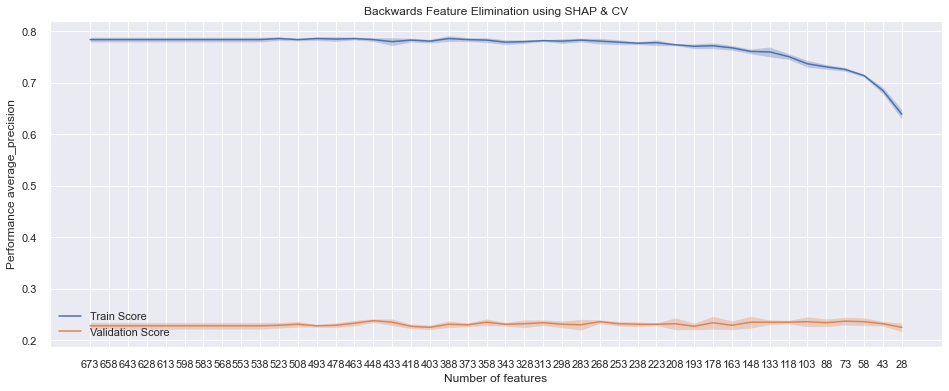

In [104]:
performance_plot = shap_elimination.plot(figsize=(16, 6))

We are going to keep 43 features as it's not too many for api and still results from cross validation not bad considering all other features sets.

In [105]:
cols_to_keep = shap_elimination.get_reduced_features_set(num_features=43)
reduced_df = data[cols_to_keep].copy()

In [108]:
full_train_data, full_test_data, full_train_target, full_test_target = train_test_split(
    reduced_df, target, test_size=0.3, stratify=target, random_state=rnd
)
idx_train = 40000
idx_test = 10000
min_train_data, min_test_data, min_train_target, min_test_target = (
    full_train_data.iloc[:idx_train, :],
    full_test_data.iloc[:idx_test, :],
    full_train_target.iloc[:idx_train],
    full_test_target.iloc[:idx_test],
)
numeric_columns = [col for col in min_train_data.select_dtypes("number")]

In [109]:
cat_columns = []
for cat_col in min_train_data.columns:
    if (
        min_train_data[cat_col].nunique() < 3
        or min_train_data[cat_col].dtype == "object"
    ) and (
        cat_col.split("_")[-1] not in ["min", "max", "mean", "count", "unique", "norm",]
    ):
        cat_columns.append(cat_col)
numeric_columns = [
    num_col
    for num_col in min_train_data.select_dtypes("number")
    if num_col not in cat_columns
]

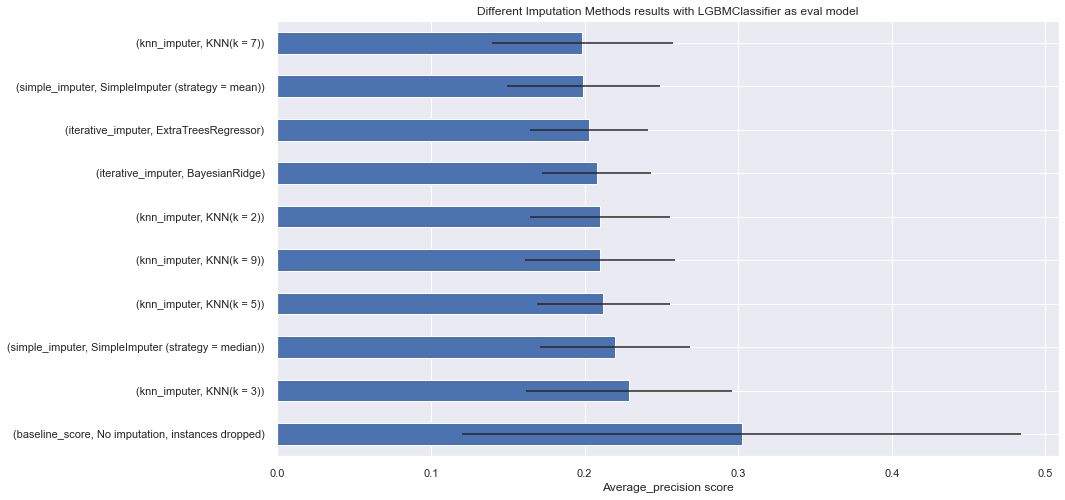

In [193]:
numeric_imputation_search(
    min_train_data[numeric_columns][:3000],
    min_train_target[:3000],
    lgbm,
    rnd,
    "average_precision",
)

We are going to use SimpleImputer with ```median``` as we need speed and also less variability.

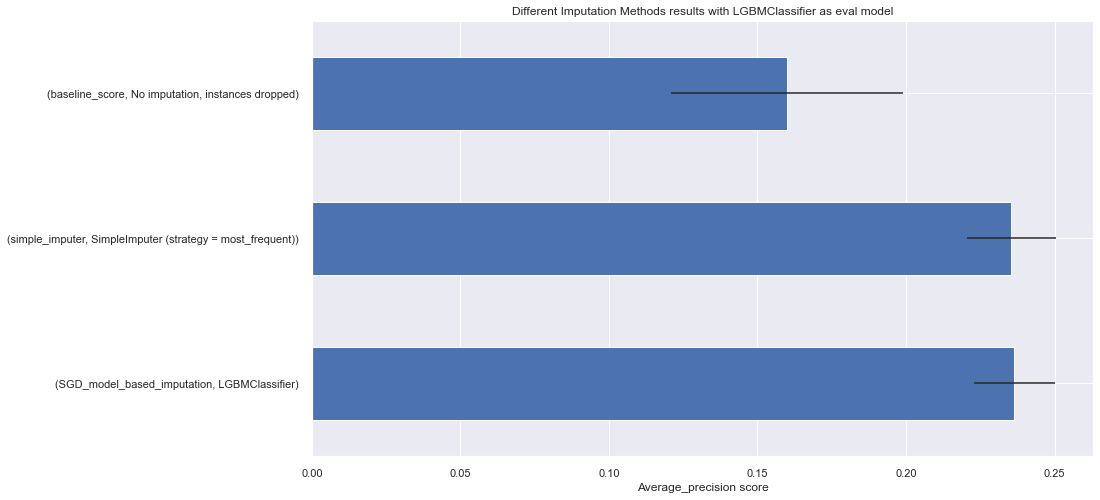

In [194]:
categorical_imputation_search(
    min_train_data, min_train_target, lgbm, "average_precision",
)

Again we will choose simpler method - SimpleImputer with ```mode``` imputation.

In [110]:
num_columns_idx = list(range(len(numeric_columns)))
cat_columns_idx = list(
    range(len(numeric_columns), (len(cat_columns + numeric_columns)))
)
prepro_opt_pipe = Pipeline(
    [
        (
            "union",
            ColumnTransformer(
                [
                    ("numeric", num_pipe, numeric_columns),
                    ("categorical", cat_pipe, cat_columns),
                ]
            ),
        ),
    ],
)

In [111]:
min_train_data_tr = prepro_opt_pipe.fit_transform(min_train_data)

"scalers": "standard",\
"cat_encoders": "one_hot",\
"clustering": "KMeans",\
"num_of_clusters": 5,\
"class_weights": "balanced"

In [112]:
cat_columns.remove("weekday_appr_process_start")
numeric_columns.extend(
    [
        "dti",
        "loans_term_months",
        "credit_income_pct",
        "days_employed_pct",
        "weekday_appr_process_start_sin",
        "weekday_appr_process_start_cos",
    ]
)

In [113]:
stateless_pipe = Pipeline(
    [
        ("domain_feature_creation", domain_feature_creation_transf),
        ("cyclic_weekday_appr_process_start", cyclic_weekday_appr_process_start_transf),
    ]
)
num_pipe = Pipeline(
    [
        ("numeric_imp", SimpleImputer(strategy="median")),
        ("kmeans_labels", KmeansClustering(5, StandardScaler())),
    ]
)
cat_pipe = Pipeline(
    [
        ("categorical_imp", SimpleImputer(strategy="most_frequent")),
        ("categorical_enc", OneHotEncoder(handle_unknown="ignore")),
    ]
)
full_pipeline = Pipeline(
    [
        ("stateless_pipe", stateless_pipe),
        (
            "union",
            ColumnTransformer(
                [
                    ("numeric", num_pipe, numeric_columns),
                    ("categorical", cat_pipe, cat_columns),
                ]
            ),
        ),
    ],
)

In [114]:
min_train_data_tr = full_pipeline.fit_transform(min_train_data)

In [115]:
num_col_len = len(numeric_columns) + len(
    full_pipeline.named_steps["union"]
    .transformers_[0][1]
    .named_steps["kmeans_labels"]
    .col_label
)
new_num_columns_idx = list(range(num_col_len))

In [110]:
baseline_results = baseline_clfmodels_eval_cv(
    [light_gbm],
    min_train_data_tr,
    min_train_target,
    StandardScaler(),
    kf,
    new_num_columns_idx,
)

In [111]:
baseline_results

,Balanced accuracy,Accuracy,Precision,Recall,F1,Average precision,Roc auc,Total time in sec
Classifier,,,,,,,,
LGBMClassifier,0.519,0.917,0.510,0.041,0.075,0.239,0.756,16.065


We can see, that although we removed over **600 features** our results are the same or e.g. ```average_precision``` has increased a little bit.

Let's tune hyper parameter using Optuna - Bayesian optimization algorithm.

In [462]:
light_gbm_best_params = joblib.load("./optimized_params/light_gbm_best_params.pkl")

In [115]:
%%capture
light_gbm = LGBMClassifier(**light_gbm_best_params)
light_gbm_hp_results = light_gbm_hptuned_eval_cv(
    light_gbm,
    min_train_data_tr,
    min_train_target.values,
    StandardScaler(),
    kf,
    new_num_columns_idx,
)

In [116]:
baseline_results.rename(
    index={"LGBMClassifier": "LGBMClassifier-Baseline-Model"}, inplace=True
)
light_gbm_hp_results.rename(
    index={"LGBMClassifier": "LGBMClassifier-After-HP-Tuning"}, inplace=True
)
results_concat = pd.concat([baseline_results, light_gbm_hp_results])
results_concat.style.background_gradient(axis=0).format(precision=3)

,Balanced accuracy,Accuracy,Precision,Recall,F1,Average precision,Roc auc,Total time in sec,Max numb of trees
Classifier,,,,,,,,,
LGBMClassifier-Baseline-Model,0.519,0.917,0.510,0.041,0.075,0.239,0.756,16.065,nan
LGBMClassifier-After-HP-Tuning,0.513,0.917,0.495,0.029,0.054,0.246,0.759,10.851,47.000


As we can see after hp optimization we have increased ```average_precision``` score as well as other metrics.

In [465]:
light_gbm.set_params(n_estimators=47)

LGBMClassifier(lambda_l1=4, lambda_l2=21, learning_rate=0.25769554472967693,
               max_depth=8, min_data_in_leaf=190,
               min_gain_to_split=0.14834121585557253, n_estimators=47,
               num_leaves=15, random_state=42, verbosity=-1)

In [117]:
numeric_scaler = ColumnTransformer(
    [("numeric", StandardScaler(), new_num_columns_idx)], remainder="passthrough"
)
final_pipeline = Pipeline(
    [("full_pipeline", full_pipeline), ("numeric_scaler", numeric_scaler)]
)

In [118]:
min_train_data_tr = final_pipeline.fit_transform(min_train_data)
min_test_data_tr = final_pipeline.transform(min_test_data)

In [120]:
%%capture
results_hp_tuned_test = clfmodels_eval_test(
    [light_gbm], min_train_data_tr, min_train_target, min_test_data_tr, min_test_target,
)

In [121]:
results_hp_tuned_test

,Balanced accuracy,Accuracy,Precision,Recall,F1,Average precision,Roc auc,Total time in sec
Classifier,,,,,,,,
LGBMClassifier,0.516,0.918,0.475,0.036,0.066,0.246,0.752,0.269


We see that our models perform quite good on a test set and metric decrease is small compared with a train set.\
Let's plot confusion matrixes of models to see how they predict positive and negative class.

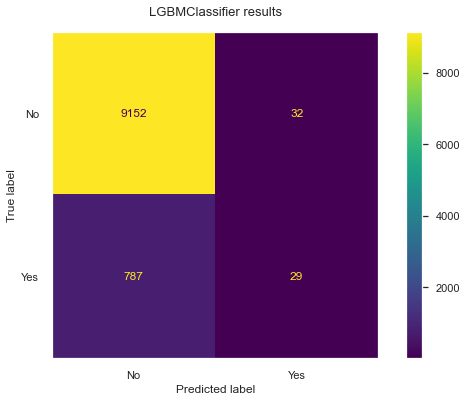

In [122]:
plot_cm(
    min_test_target,
    light_gbm.predict(min_test_data_tr),
    ["No", "Yes"],
    "viridis",
    True,
    "LGBMClassifier results",
    None,
)

We can see that model predicted negative class - ```client's loan not being defaulted``` almost with perfect precision and recall, respectively 9152 instances out of 9184 were labelled as Negative class (Recall) and 787 instances misclassified as a Negative class being a Positive class (Precision).\
For a positive class we see that out of 816 instances only 29 were classified as Positive class (Recall). 32 instances were classified as Negative class. We clearly see that we need to adjust threshold for probabilities, in order to get better **Recall** rate.\
Let's also plot Precision-Recall curve to check to see how threshold could be adjusted to get e.g., more recall while lowering precision, as our precision is higher than recall.

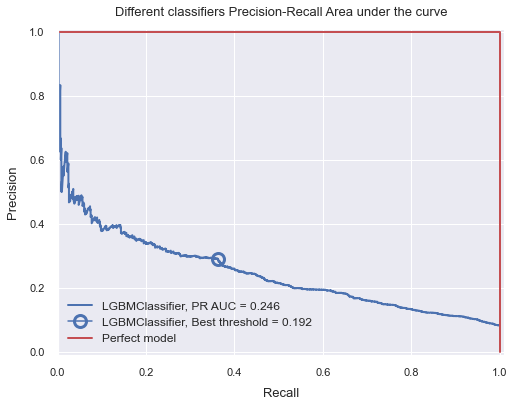

In [123]:
plot_pr_auc(
    [light_gbm], min_test_data_tr, min_test_target, ["LGBMClassifier"], True,
)

We can Precision-Recall curve which is far from ideal and optimal threshold for ```F1``` score. We are going to adjust threshold not for F1 metric, but for ```Recall```.

**Training and testing classifier on a whole data set.**

Let's analyze model's performace as confusion matrix, learning and validation curves as well as Discrimination threshold plot on whole data set.

In [119]:
train_data_tr = final_pipeline.fit_transform(full_train_data)
test_data_tr = final_pipeline.transform(full_test_data)

In [125]:
%%capture
results_hp_tuned_full_data = clfmodels_eval_test(
    [light_gbm], train_data_tr, full_train_target, test_data_tr, full_test_target,
)

In [126]:
results_hp_tuned_full_data.rename(
    index={"LGBMClassifier": "LGBMClassifier-Whole-DataSet-Results"}, inplace=True
)
final_results_concat = pd.concat([results_concat, results_hp_tuned_full_data])
final_results_concat.style.background_gradient(axis=0).format(precision=3)

,Balanced accuracy,Accuracy,Precision,Recall,F1,Average precision,Roc auc,Total time in sec,Max numb of trees
Classifier,,,,,,,,,
LGBMClassifier-Baseline-Model,0.519,0.917,0.510,0.041,0.075,0.239,0.756,16.065,nan
LGBMClassifier-After-HP-Tuning,0.513,0.917,0.495,0.029,0.054,0.246,0.759,10.851,47.000
LGBMClassifier-Whole-DataSet-Results,0.516,0.919,0.518,0.034,0.064,0.256,0.773,1.608,nan


We can see that more data did help to increase the results a bit.

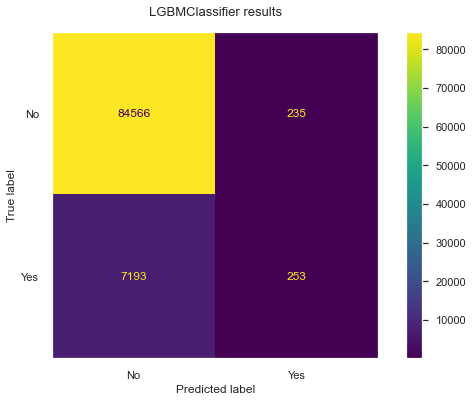

In [127]:
plot_cm(
    full_test_target,
    light_gbm.predict(test_data_tr),
    ["No", "Yes"],
    "viridis",
    True,
    "LGBMClassifier results",
    None,
)

We see quite similar situation as with reduced data set.

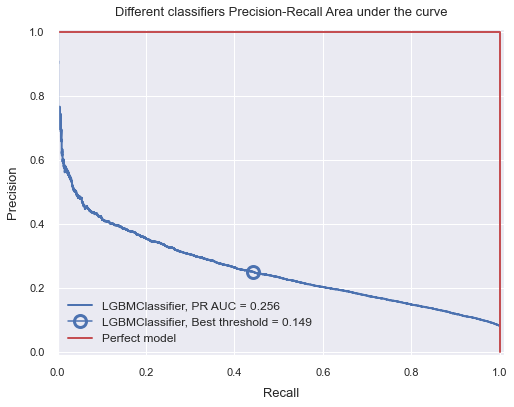

In [128]:
plot_pr_auc(
    [light_gbm], test_data_tr, full_test_target, ["LGBMClassifier"], True,
)

As we have more data curve is smoother and ```Area under the Curve``` has increased a bit too.

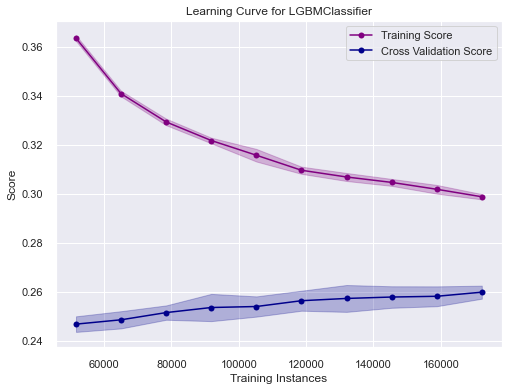

In [129]:
plot_learning_curve(
    light_gbm, train_data_tr, full_train_target, kf, "average_precision"
)

We can see that model is overfiting with smaller data set and when data set is increasing overfiting is decreasing. Let's also check a validation curve.

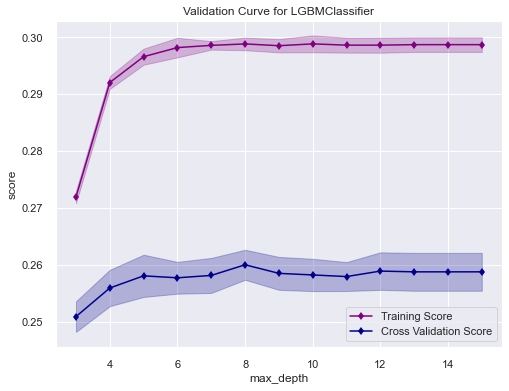

In [130]:
plot_validation_curve(
    light_gbm,
    train_data_tr,
    full_train_target,
    kf,
    "max_depth",
    np.arange(3, 16),
    "average_precision",
)

We see LGBM Classifier parameter ```max_depth``` which describe how deep decision tree is influence on training and cross validation scores.

In [131]:
%%capture
fig = plot_discrimination_threshold(
    light_gbm, train_data_tr, full_train_target, kf, 10, "fscore"
)

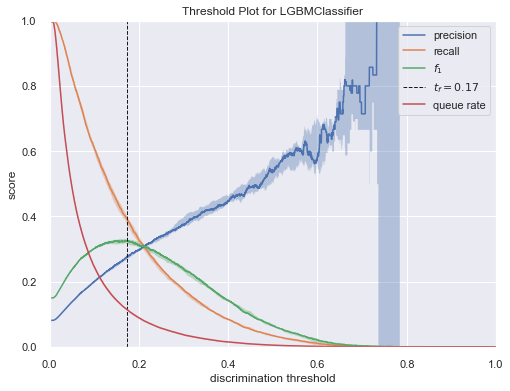

In [132]:
fig

In this graph we can see ```precision```, ```recall```, ```f1``` scores curves against a threshold as well as ```queue rate``` (FPR/Fall-out) curve. A ```queue rate``` describes the percentage of instances that must be reviewed (the probability that false alerts will be raised). If review has a high cost (e.g., fraud prevention) then this must be minimized with respect to business requirements; if it doesn't (e.g., spam filter), this could be optimized to ensure the inbox stays clean. The vertical dashed line is optimal threshold for ```f1``` metric. If e.g., we choose a threshold of 0.17 (an optimal one calculated for f1 score), then we can read this graph like this:
- About 12% of cases will be queued. So e.g., if 1000 loans are evaluated each day, about 120 of them will be selected for special treatment (further manual review).
- Our precision will be about 28%. So, of the cases we queue, 28% will really going to be ```defaulted``` if we don't intervene.
- Our recall will be about 40%. Of all users whose loans area going to be default, we'll catch 40% with our model.

Of course, optimal threshold of ```f1``` score might not be the best threshold value for business and depends on various variables like company's capacity of reviewing loan cases manually, cost of ```False Positives``` and ```False Negatives``` and other conditions.

**Threshold moving for our classifier**

Let's consider a situation that we presented our model to the management, and they said that the goal is to have a ```recall``` of **60%** for our model to be effective.\
A default threshold for classifiers is usually set to 0.5 by default. We are going to inherit a class from ```LGBM Classifier``` and set up our own methods we require for optimizing threshold for our targeted ```recall``` value.

In [458]:
(
    eval_data_thresh,
    test_data_thresh,
    eval_thresh_target,
    test_thresh_target,
) = train_test_split(
    full_test_data,
    full_test_target,
    test_size=0.4,
    stratify=full_test_target,
    random_state=rnd,
)

In [459]:
eval_data_thresh_tr = final_pipeline.transform(eval_data_thresh)
test_data_thresh_tr = final_pipeline.transform(test_data_thresh)

In [466]:
light_gbm_best_params = light_gbm.get_params()
lgbm_threshold = LGBMWithThreshold(**light_gbm_best_params)

In [468]:
%%capture
lgbm_threshold.fit(train_data_tr, full_train_target)
light_gbm.fit(train_data_tr, full_train_target)

In [469]:
threshold, _ = lgbm_threshold.threshold_from_desired_recall(
    eval_data_thresh_tr, eval_thresh_target, 0.6
)

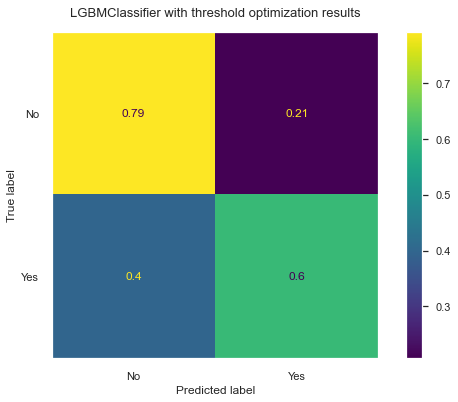

In [139]:
plot_cm(
    test_thresh_target,
    lgbm_threshold.predict(test_data_thresh_tr, threshold),
    ["No", "Yes"],
    "viridis",
    True,
    "LGBMClassifier with threshold optimization results",
)

We see that our results changed after we optimized threshold for a ```recall``` of 0.6. Let's compare it with a model with default threshold.

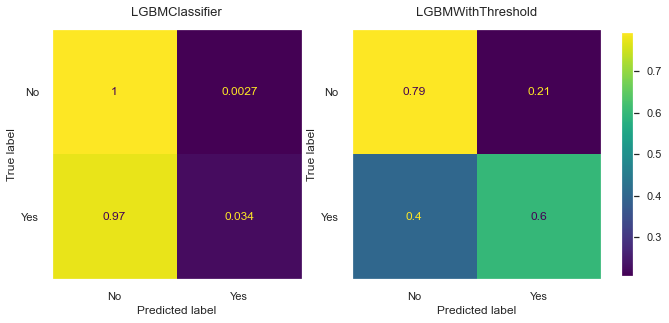

In [481]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plt.rc("font", size=12)

for i, ax in enumerate(axes.flatten()):

    if i == 0:
        y_predicted = light_gbm.predict(test_data_tr)
        title = light_gbm.__class__.__name__
    else:
        y_predicted = lgbm_threshold.predict(test_data_tr, threshold)
        title = lgbm_threshold.__class__.__name__

    cm = confusion_matrix(full_test_target, y_predicted, normalize="true")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"],)
    disp.plot(colorbar=False, cmap="viridis", ax=ax)

    ax.set_title(
        title, fontsize=13, y=1.03,
    )

    ax.grid(False)

cax, kw = mpl.colorbar.make_axes([ax for ax in axes.flatten()], shrink=0.75, pad=0.03)
fig.colorbar(disp.im_, cax=cax, **kw)

plt.show()

From confusion matrix comparison we can see, that with adjusted threshold to get ```0.6``` recall we are labelling a 60 % of all 
```default``` cases, incorrectly labelling 40 % of them as not default (negative class). ```Precision``` for predicting a positive class is 20 % e.g., out of all instances we labelled as positive class, only 20% were correctly labelled.\
From our previous Threshold Discrimination plot we can see, that when recall is 60 %, a ```queue rate``` is also at about 60%, meaning that 60% of cases will be queued. So, following our previous example - out of 1000 loans which our model evaluates per day, about 600 of them will be selected for further manual review by personnel, which is very high and demanding. Unfortunately, we cannot lower ```recall``` as 60% is on the lower side already. In general, this model performance is poor.

Let's save our full pipeline and LightGBM model for web app.

**Analizing Features Importance**

In [471]:
one_hot_cat = (
    final_pipeline.named_steps["full_pipeline"]
    .named_steps["union"]
    .transformers_[1][1][1]
    .categories_
)
cat_columns_pipe = [
    f"{col}_{val}" for col, vals in zip(cat_columns, one_hot_cat) for val in vals
]
feature_names = (
    numeric_columns
    + final_pipeline.named_steps["full_pipeline"]
    .named_steps["union"]
    .transformers_[0][1][1]
    .col_label
    + cat_columns_pipe
)

In [472]:
explainer = shap.TreeExplainer(lgbm_threshold)
shap.initjs()

In [473]:
observation = test_data_tr[100].reshape(1, -1)
shap_values = explainer.shap_values(observation)
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1],
    features=observation,
    feature_names=feature_names,
    link="logit",
)

Shap's library force plot breaks down a prediction to show the impact of each feature. ```LGBMClassifier``` predicted that this instance probability of ```default``` a loan is almost 0. The ```base_value``` (the average model output based on provided data set) is ```0.05484```.\
Feature values causing increased predictions are in red, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact that pushes results towards negative ```default``` outcome comes from ```ext_source_3``` (Normalized score from external data source) and aggregated feature from ```previuos_application``` data set (Grouped interest rate into small medium and high of the previous application).\
Features that push outcome to loan being ```defaulted``` are ```ext_source_2``` (Normalized score from external data source) and ```loans_term_months``` (loans's term in months).\
Let's also check what features impact positive outcome for client's application.

In [474]:
observation = test_data_tr[867].reshape(1, -1)
shap_values = explainer.shap_values(observation)
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1],
    features=observation,
    feature_names=feature_names,
    link="logit",
)

So, we see that for ```positive``` outcome for a loan being a **default** - ```ext_source_2```, ```ext_source_3``` and ```previuos_application_name_contract_status_refused_count_norm``` (a normalized count of clients previuos applications which have been refused for a loan) are most influential features. Interesting that having a car ```lowers``` client's probability of ```defaulting``` a loan.

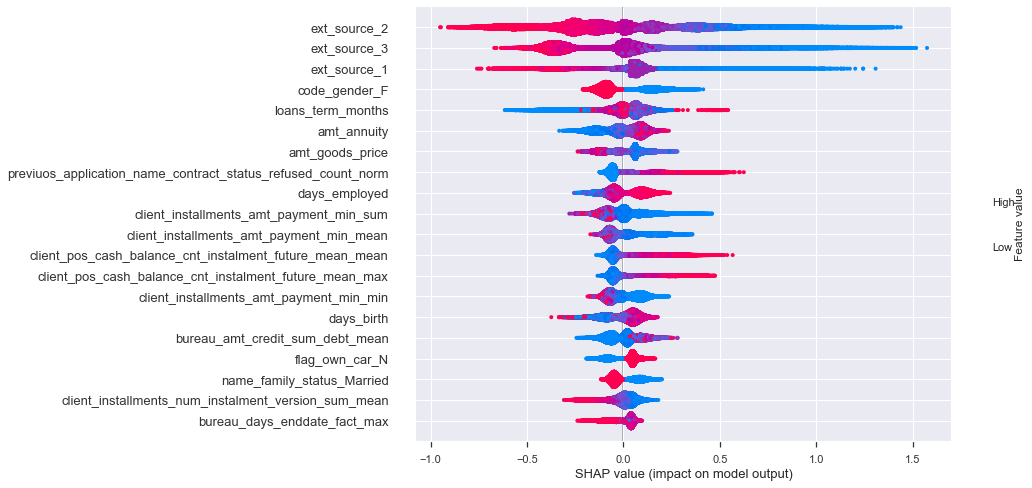

In [475]:
shap_values = explainer.shap_values(test_data_tr)
shap.summary_plot(
    shap_values[1],
    test_data_tr,
    feature_names=feature_names,
    max_display=20,
    plot_size=(12, 8),
)

Shap's ```summary_plot``` gives an overview on feature importance from test data set. Shap values are displayed on x axis in log odds scale. We see that low values of ```ext_source_2```, ```ext_source_3``` and ```ext_source_1``` features contribute to loan being ```default```.\
Being a ```woman``` also means lower probability of not returning a loan, although we could raise a question is it ethical to consider gender as one of the features in a model.\
Next by importance are ```loan_term_months```, ```amt_annuity``` and ```amt_goods_price``` features.

## Conclusion <a name="conclusion"></a>

During **EDA**, firstly, we wanted to find out **who “Credit Bureau” client really is**. A data suggests this client profile:
- A married woman (66 % of all clients) with no children, usually with secondary or higher education, between 43 and 69 year old (more than 50 % of all women falls in that range).
- Client’s income comes mainly from working activities, followed by pensioner incomes.
- Males tend to take bigger loans than females.
- Most popular occupations are Laborers, Sales staff and Core staff.
- A cash loans are more popular than revolving loans.

Secondly, we were interested **what influences client to default loan**. I found out, that:
- Low-skill Laborers, Drivers and Waiters/barmen occupation increases client probability of not paying a loan in time.
- Loan default ratio is higher among males than females.
- Having 4 and more children also contributes to increase of probability of defaulting loan.
- Having a riskier occupation like Low-skill Laborers, Drivers, Waiters/barmen staff and Security staff and being single or having civil marriage also increase probability of loan default.

Finally, we wanted to know **what kind of loans are being defaulted**. My findings are:
- Cash loans have higher ratio of default than revolving loans.
- Loans of 8 - 16 months term have bigger risk of being default compared with other loan terms.
- Loans of amount between 270000 - 513531 have increased risk of being default compared with other amount ranges.

**Inferential Statistical Analysis** showed that:
- There is statistically significant difference between males who have 1 child default loans proportion and females who have 1 child default loans proportion, males’ proportion being higher.
- There is a significant difference in client_age means between clients who defaulted loan and clients who did not, clients who defaulted loan age mean being lower.

In **Machine Learning part**, we created a model to predict whether client's loan is going to be defaulted. Key takeaways are:
- Recursive Feature Elimination with SHAP values allowed us to reduce feature space from over 600 hundred to 43.
- LGBM Classifier yielded best results taking into consideration speed, flexibility and robustness of a model.
- Our target metric was average precision. Unfortunately, modelling results were poor - 0.256 on a whole test set.
- Threshold moving of a classifier showed us, how it is possible to adjust threshold (a value of probability when to classify an instance as a negative or positive class) based on a metric which translates business goal to machine learning metric. In our case - this metric was a Recall and minimum value was 0.6.
- 3 most important features for a model were normalized scores from external data source. Unfortunately, we did not have any additional information about those features.

## Bonus Challenge - Classification with PyTorch<a name="bonus"></a>

I will use PyTorch DL library to build a simple classification model and check how it compares to LGBM Classifier.

We set up simple NN model with 2 layers.

In [530]:
epochs = 6
batch_size = 4000
learning_rate = 0.001

In [510]:
(train_data_nn, val_data_nn, train_target_nn, val_target_nn,) = train_test_split(
    full_train_data,
    full_train_target,
    test_size=0.2,
    stratify=full_train_target,
    random_state=rnd,
)
nn_pipe = deepcopy(final_pipeline)

In [524]:
train_data_nn_tr = nn_pipe.fit_transform(train_data_nn)
val_data_nn_tr = nn_pipe.transform(val_data_nn)
test_data_nn_tr = nn_pipe.transform(full_test_data)

In [525]:
train_data = TrainData(
    torch.FloatTensor(train_data_nn_tr), torch.FloatTensor(train_target_nn.values)
)
val_data = ValData(
    torch.FloatTensor(val_data_nn_tr), torch.FloatTensor(val_target_nn.values)
)
test_data = TestData(torch.FloatTensor(test_data_nn_tr))

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size)

In [532]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

BinaryClassification(
  (layer_1): Linear(in_features=134, out_features=670, bias=True)
  (layer_2): Linear(in_features=670, out_features=670, bias=True)
  (layer_out): Linear(in_features=670, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(670, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(670, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [533]:
model.train()
for e in range(1, epochs + 1):
    e_t_l = 0
    e_t_avg_p = 0
    e_val_l = 0
    e_val_avg_p = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()

        y_pred = model(X_batch)
        y_test = y_batch.unsqueeze(1).cpu().detach().numpy()

        loss = criterion(y_pred, y_batch.unsqueeze(1))
        avg_precision_value = avg_precision(y_pred, y_test)

        loss.backward()
        optimizer.step()

        e_t_l += loss.item()
        e_t_avg_p += avg_precision_value

    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            y_pred = model(X_batch)
            y_test = y_batch.unsqueeze(1).cpu().detach().numpy()

            loss = criterion(y_pred, y_batch.unsqueeze(1))
            avg_precision_value = avg_precision(y_pred, y_test)

            e_val_l += loss.item()
            e_val_avg_p += avg_precision_value
    print(
        f"""Epoch {e+0:03}: | Train_Loss: {e_t_l/len(train_loader):.5f} | Train_Avg_Precision: {e_t_avg_p/len(train_loader):.3f}
           | Val_Loss: {e_val_l/len(val_loader):.5f} | Val_Avg_Precision: {e_val_avg_p/len(val_loader):.3f}"""
    )

Epoch 001: | Train_Loss: 0.60868 | Train_Avg_Precision: 0.188
           | Val_Loss: 0.46882 | Val_Avg_Precision: 0.217
Epoch 002: | Train_Loss: 0.26807 | Train_Avg_Precision: 0.228
           | Val_Loss: 0.25152 | Val_Avg_Precision: 0.233
Epoch 003: | Train_Loss: 0.24133 | Train_Avg_Precision: 0.269
           | Val_Loss: 0.24837 | Val_Avg_Precision: 0.241
Epoch 004: | Train_Loss: 0.23486 | Train_Avg_Precision: 0.291
           | Val_Loss: 0.25026 | Val_Avg_Precision: 0.239
Epoch 005: | Train_Loss: 0.23501 | Train_Avg_Precision: 0.306
           | Val_Loss: 0.24992 | Val_Avg_Precision: 0.235
Epoch 006: | Train_Loss: 0.23264 | Train_Avg_Precision: 0.314
           | Val_Loss: 0.25257 | Val_Avg_Precision: 0.234


In [534]:
test_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        test_pred_list.extend(y_test_pred.cpu().numpy().flatten())
test_pred_labels = [1 if p > 0.5 else 0 for p in y_pred_list]

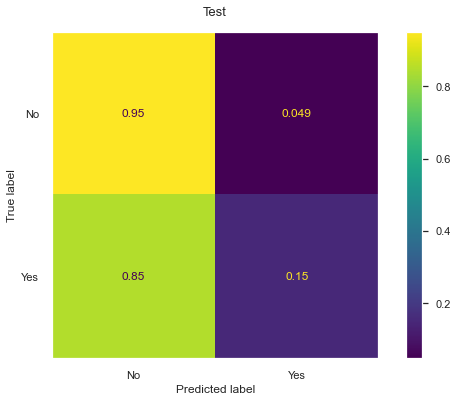

In [535]:
plot_cm_without_model(
    full_test_target, test_pred_labels, ["No", "Yes"], "viridis", True, "Test"
)

In [536]:
torchclf_eval_test(full_test_target, test_pred_list, test_pred_labels)

,Balanced accuracy,Accuracy,Precision,Recall,F1,Average precision,Roc auc
Classifier,,,,,,,
PyTorch Binary Classifier,0.552,0.887,0.215,0.153,0.179,0.228,0.747


As we see results are quite good compared with our LGBM Classifier. After HP tuning with LGBM model we managed to reach ```Average precision``` **0.256** and ```Roc auc``` **0.773** on a test set respectivelly.\
With two layers deep nn without any hyper-parameter tuning we managed to get ```Average precision``` score of **0.228** and ```Roc auc``` score of **0.747**. So there is still place for improvement.